# Выпускной проект: Анализ оттока клиентов банка "Метанпром"

# Материалы: 
**<a href="https://disk.yandex.ru/d/UvONSenpUyrlwQ">Презентация для отдела маркетинга банка</a> <br>**
**<a href="https://public.tableau.com/shared/HZCF2GWB9?:display_count=n&:origin=viz_share_link">Дашборд Tableau</a>**

# Описание проекта:
У "Метанпром" банка драматично высокий отток клиентов. Отточные клиенты - те, кто написал договор о расторжении, но есть еще некоторое время, чтобы вместе с отделом маркетигна поработать с ними и исправить ситуацию.


**Заказчик:** отдел маркетинга, а именно менеджер, который занимается маркетиновыми кампаниями и работает в тесной связке с менеджерами продуктов.

# Цели и задачи проекта:

**Цель:** провести анализ клиентов банка и выявить сегменты клиентов, наиболее склонных к уходу из банка.
<br><br>
**Задачи:**
- Провести исследовательский анализ данных.
- Выделить портреты клиентов, которые склонны уходить из банка,
- Сформулировать и проверить статистические гипотезы.

# Описание данных

Файл: *dataset_scrooge.csv*

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**Колонки:**

- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город (Ярославль, Ростов Великий, Рыбинск),
- `gender` — пол,
- `age` — возраст,
- `equity`  — количество баллов собственности (шкала от 0 до 9)
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта (1 или 0, т.е. да или нет),
- `last_activity` — активный ли клиент (1 или 0, т.е. да или нет),
- `EST_SALARY` — заработная плата клиента,
- `churn` — собирается ли уходить (1 или 0, т.е. да или нет).

# Декомпозиция (план действий):

**Шаг 1. Предобработка данных. Импорт библиотек и загрузка датасета** <br> 

1. Воспользуемся библиотеками: 
* pandas
* numpy
* seaborn
* plotly
* datetime
* math
* matplotlib.pyplot
* stats from scipy

2. Загрузка датасета: *dataset_scrooge.csv*
<br><br>
**Шаг 2. Подготовка данных** <br>
1. Знакомство с датасетом: количество строк, пропусков, типы данных в столбцах.<br>
2. Замена названий столбцов (приведение нижнему регистру).<br>
3. Проверка на пропуски, их обработка. <br>
4. Приведение типов данных в столбцах к соответствующим содержимому типам.<br>
5. Проверка на дубликаты (явные и неявные), их обработка. <br>
6. Проверка на выбросы, их обработка.
7. Кодирование данных (пол, город).
8. Промежуточный вывод.
<br><br>  
**Шаг 3. Исследовательский анализ данных**<br>
1. Исследование распределения признаков, построение графиков распределения. <br>
2. Построение и анализ матрицы корреляции признаков к оттоку. <br>
3. Сегментация клиентов по категориям (баланс, возраст и т.д.) с учетом распределения.<br>
4. Составление портрета склонного к оттоку клиента и промежуточный вывод.
<br><br> 
**Шаг 4. Статистический анализ данных и проверка гипотез:** <br>
1. Формулирование первой гипотезы о различии дохода между теми клиентами, которые ушли и теми, которые остались. Её проверка.  <br>
2. Формулирование второй гипотезы, её проверка. <br>
3. Формулирование второй гипотезы, её проверка. <br>
4. Промежуточный вывод.
<br>
**Шаг 5. Рекомендации для отдела маркетинга.**
 <br> <br>
**Шаг 6. Общий вывод**
 <br>
 
**Шаг 6. Презентация для отдела маркетинга** 

## Предобработка данных
Импорт библиотек и загрузка датасета

In [102]:
# Импортируем библиотеки:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math as mth

import warnings
warnings.filterwarnings('ignore')

import plotly.io as pio 
pio.renderers.default = 'notebook+jupyterlab+png'
pio.renderers['png'].scale = 1.0

import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats as st
%matplotlib inline

In [2]:
#Загружаем датасет scrooge.csv и сохраняем в переменную data:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
data = pd.read_csv(path)
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


## Подготовка данных

### Знакомство с датасетом: количество строк, пропусков, типы данных в столбцах.

In [3]:
data.shape

(10000, 12)

**Резюме:** в нашем датасете 12 столбцов и 10000 строк.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
# Убедимся, что нет случайных лишних значений в ряде столбцов: city, gender, credit_card, last_activity, churn. 
# Например, город написан с ошибкой или значение 2 там, где должны быть 1 и 0:

print('City values: ', data.city.unique())
print('Gender values: ', data.gender.unique())
print('Credit card values: ', data.credit_card.unique())
print('Last activity values: ', data.last_activity.unique())
print('Churn values: ', data.churn.unique())

# Хотя это можно считать частью проверки на дубликаты, важно убедиться в отсутствии ошибочных данных до работы с пропусками.

City values:  ['Рыбинск' 'Ярославль' 'Ростов']
Gender values:  ['Ж' 'М']
Credit card values:  [0 1]
Last activity values:  [1 0]
Churn values:  [1 0]


**Резюме:**  <br>

**1. Пропуски** из 12 столбцов имеются только в 2-х: *age* и *balance.* 


**2. Типы данных:** 
* Целочисленные (int64) - USERID, equity, products, credit_card, last_activity, churn;
* Вещественные числа (float64) - score, age, balance, EST_SALARY;
* Текстовые (object) - city, gender.

Потребуется привести типы данных в соответствие с содержимым для следующих столбцов: 

А. Из вещественного в целочисленное:
* *score* - так как оценки выставлены целыми числами, значения после точки - нулевые;
* *age* - так как возраст - целое число;
* *balance* - так как значения баланса в копейках нам знать ни к чему, округлим в большую сторону;
* *EST_SALARY* - так как запрплату в копейках нам знать ни к чему, округлим в большую сторону.

Б. Из целочисленного в булево значение:
* *credit_card* - 1 или есть - True, 0 или нет - False;
* *last_activity* - 1 или была активность - True, 0 или не было активности - False;
* *churn* - 1 или подал заявление на расторжение - True, 0 или не подавал заявление - False.

Но для начала приведем все названия столбцов к нижнему регистру.

### Замена названий столбцов (приведение нижнему регистру).

In [6]:
# Приведем все столбцы к нижнему регистру:
data.columns = data.columns.str.lower()

# Переименуем столбец userid в user_id:
data = data.rename(columns = 
                   {'userid': 'user_id'})
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Проверка на пропуски, их обработка.

In [7]:
# Посчитаем, сколько пропусков в столбцах age и balance:
no_age_counter = data.age.isnull().sum()
no_balance_counter = data.balance.isnull().sum()
print('Пропусков в столбце age: {}. Пропусков в столбце balance: {}.'.format(no_age_counter, no_balance_counter))

Пропусков в столбце age: 26. Пропусков в столбце balance: 2295.


In [8]:
#Выведем строки с пропущенным значением возраста:
no_age = data.loc[data['age'].isna()].sort_values( by='user_id', ascending=True)
no_age.head(30)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8785,127440,663.0,Ярославль,М,NaN,0,NaN,1,1,1,117197.56,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
9819,140934,832.0,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9457,141945,929.0,Ярославль,М,NaN,0,NaN,1,1,0,381868.89,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
9667,163657,849.0,Ярославль,М,NaN,4,1254013.85,2,1,1,119106.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0
9632,185829,927.0,Ярославль,М,NaN,0,NaN,1,1,0,231254.86,0
9380,187459,894.0,Рыбинск,М,NaN,0,NaN,1,1,0,178012.28,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0


In [9]:
# Посмотрим, как распределены пропуски возраста по полу:
no_age.gender.value_counts()

М    14
Ж    12
Name: gender, dtype: int64

In [10]:
# Посчитаем, сколько не заполненных значений в balance у выведенных нами строк с пустыми значениями age:
display(len(no_age[no_age['balance'].isnull()]))

16

In [11]:
# Посмотрим, как распределены строки с пропущенными значением возраста по городам:
no_age.city.value_counts()

Ярославль    13
Рыбинск      12
Ростов        1
Name: city, dtype: int64

In [12]:
# Посмотрим, как распределены пропуски возраста по активности:
no_age.last_activity.value_counts()

1    20
0     6
Name: last_activity, dtype: int64

**Резюме:**
* По полу пропуски в значениях age преобладают у мужчин - 14, а у женщин - 12.
* Из 26 строк с пропусками в столбце age 16 строк также содержат пропуски в столбце balance.
* По Ярославлю и Рыбинску строки с пропусками age распределены примерно одинаково: 13 и 12 соответственно. На Ростов приходится всего 1 пропуск.
* По активности пропуски в столбце age преобладают у активных - 20, а неактивных - всего 6.
* Обратим внимание на столбец churn для строк с пропущенным возрастом: **25 из 26 строк содержат 0, то есть клиент не собирается уходить в данный момент**.   

**Вывод по пропускам age:**

Судя по всему, при выгрузке часть данных была утеряна, так как возраст  - информация, которую клиент не может утаить от самого банка (ведь при заключении договора и открытии счета он предъявляет сотруднику банка свой паспорт).  
Даже если предположить, что каким-то образом возраст из паспорта не был внесен в базу (например, при удаленной регистрации в банке), то 16 пропусков в balance тех же строк, где содержатся пропуски age, подтверждают гипотезу о технической причине ошибки как минимум для 16 из 26 строк без age. 

**Примем все 26 пропусков age за техническую ошибку.**

Сообщим об этом инженерам данных, а для текущего проекта заменим пропуски на -1. При построении графиков и в расчетах будем исключать это значение.

In [13]:
# Заменяем пропуски в age на -1:
data['age'] = data['age'].fillna(value=-1).astype('int64')
display((data[data['age']==-1]).head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,-1,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,-1,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,-1,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,-1,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,-1,1,238330.52,2,0,1,93775.06,0


In [14]:
#Выведем строки с пропущенным значением баланса или остатка на счете:
no_money = data.loc[data['balance'].isna()].sort_values(by='user_id', ascending=True)
no_money

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1834,114182,890.0,Рыбинск,М,32,0,NaN,1,1,0,82847.95,0
4025,114196,915.0,Рыбинск,М,31,0,NaN,1,1,1,133324.89,0
4580,114209,892.0,Ярославль,Ж,29,0,NaN,1,1,0,120174.24,0
3980,114347,703.0,Ярославль,Ж,33,0,NaN,1,1,0,171038.71,0
7017,114422,708.0,Ярославль,Ж,69,0,NaN,1,1,0,159013.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8026,229036,948.0,Рыбинск,Ж,43,0,NaN,1,0,0,241225.29,0
3798,229050,899.0,Ярославль,Ж,40,0,NaN,1,0,0,169445.35,0
8622,229052,921.0,Рыбинск,М,42,0,NaN,1,1,1,221661.10,0
2373,229054,883.0,Ярославль,М,27,0,NaN,1,1,1,144948.73,0


In [15]:
# Посмотрим, как распределены пропуски баланса по полу:
no_money.gender.value_counts()

М    1282
Ж    1013
Name: gender, dtype: int64

In [16]:
# Посмотрим, как распределены строки с пропущенными значением баланса по городам:
no_money.city.value_counts()

Ярославль    1467
Рыбинск       593
Ростов        235
Name: city, dtype: int64

In [17]:
# Посмотрим, как распределены пропуски баланса по активности:
no_money.last_activity.value_counts()

1    1261
0    1034
Name: last_activity, dtype: int64

In [18]:
#Посчитаем, сколько из 2295 записей со значением equity, то есть оценки собственности, равным 0:
display(len(no_money[no_money['equity']==0]))

2180

In [19]:
#Посчитаем, сколько из 2295 записей со значением churn, равным 1, то есть собираются уходить:
display(len(no_money[no_money['churn']==1]))

13

**Резюме по balance:**
* По полу пропуски в значениях balance преобладают у мужчин - 1282, а у женщин - 1013.
* Больше всего строк с пропущенным балансом из Ярославля - 1467, из Рыбинска лишь 593, а из Ростова - 235.
* По активности пропуски в столбце age преобладают у активных - 1261, неактивных меньше - 1034.
* Из 2295 строк с пропущенным балансом аж 2180 имеют оценку собственности (equity), равную 0.
* Из 2295 строк с пропущенным балансом **только 13 подали заявление на расторжение договора с банком**, т.е. churn = 1.

**Вывод по пропускам balance:**

Судя по всему, при выгрузке часть данных была утеряна, так как остаток на счете - информация, которую клиент не может утаить от самого банка, и как минимум баланс может быть нулевым. В нашем же случае 2295 строк просто являлись NaN, то есть неизвестно, нулевыми или нет. 

**Поэтому примем пропуски balance за техническую ошибку.**

Сообщим об этом инженерам данных, а для текущего проекта заменим пропуски на -1. При построении графиков и расчетах будем исключать это значение.

In [20]:
# Заменяем пропуски в balance на -1:
data['balance'] = data['balance'].fillna(value=-1).astype('int64')
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25,1,59214,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37,5,850594,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30,0,-1,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51,5,1524746,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34,5,174,1,1,0,67353.16,1


### Приведение типов данных в столбцах к соответствующим содержимому типам.


1. Из вещественного в целочисленное:
* *score* - так как оценки выставлены целыми числами, значения после точки - нулевые;
* *age* - так как возраст - целое число;
* *balance* - так как значения баланса в копейках нам знать ни к чему, округлим в большую сторону;
* *est_salary* - так как запрплату в копейках нам знать ни к чему, округлим в большую сторону.

2. Из целочисленного в булево значение:
* *credit_card* - 1 или есть - True, 0 или нет - False;
* *last_activity* - 1 или была активность - True, 0 или не было активности - False;
* *churn* - 1 или подал заявление на расторжение - True, 0 или не подавал заявление - False.


In [21]:
data[['score', 'age', 'balance', 'est_salary']] = data[['score', 'age', 'balance', 'est_salary']].astype('int64')
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214,2,0,1,75719,1
1,146556,861,Рыбинск,Ж,37,5,850594,3,1,0,86621,0
2,120722,892,Рыбинск,Ж,30,0,-1,1,1,1,107683,0
3,225363,866,Ярославль,Ж,51,5,1524746,2,0,1,174423,1
4,157978,730,Ярославль,М,34,5,174,1,1,0,67353,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        10000 non-null  int64 
 1   score          10000 non-null  int64 
 2   city           10000 non-null  object
 3   gender         10000 non-null  object
 4   age            10000 non-null  int64 
 5   equity         10000 non-null  int64 
 6   balance        10000 non-null  int64 
 7   products       10000 non-null  int64 
 8   credit_card    10000 non-null  int64 
 9   last_activity  10000 non-null  int64 
 10  est_salary     10000 non-null  int64 
 11  churn          10000 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 937.6+ KB


In [23]:
data[['credit_card', 'last_activity', 'churn']] = data[['credit_card', 'last_activity', 'churn']].astype('bool')
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214,2,False,True,75719,True
1,146556,861,Рыбинск,Ж,37,5,850594,3,True,False,86621,False
2,120722,892,Рыбинск,Ж,30,0,-1,1,True,True,107683,False
3,225363,866,Ярославль,Ж,51,5,1524746,2,False,True,174423,True
4,157978,730,Ярославль,М,34,5,174,1,True,False,67353,True


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        10000 non-null  int64 
 1   score          10000 non-null  int64 
 2   city           10000 non-null  object
 3   gender         10000 non-null  object
 4   age            10000 non-null  int64 
 5   equity         10000 non-null  int64 
 6   balance        10000 non-null  int64 
 7   products       10000 non-null  int64 
 8   credit_card    10000 non-null  bool  
 9   last_activity  10000 non-null  bool  
 10  est_salary     10000 non-null  int64 
 11  churn          10000 non-null  bool  
dtypes: bool(3), int64(7), object(2)
memory usage: 732.5+ KB


**Резюме по типам данных:**
    
* Мы привели типы данных в соответствии со значениями в столбцах.
* Теперь у нас 7 целочисленных, 3 булевых и 2 текстовых столбца.

Можем переходить к проверке на дубликаты.

### Проверка на явные и неявные дубликаты.
#### Явные дубликаты:

In [25]:
#Проверка на явные дубликаты:
print('Полных совпадений строк:', data.duplicated().sum())

Полных совпадений строк: 0


#### Неявные дубликаты:

In [26]:
#Быстрая проверка на неявные дубликаты:
print('Количество дубликатов:', data['user_id'].duplicated().sum())

Количество дубликатов: 73


Где-то спряталось 73 дубликата по user_id, выведем их:

In [27]:
duplicate_results = (data[data.duplicated(subset=['user_id'],keep=False)]).sort_values(by='user_id', ascending=True)
duplicate_results.head(20)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,362756,3,False,True,175920,True
7694,116540,887,Ярославль,Ж,38,0,-1,1,False,True,119247,False
7542,117943,880,Ярославль,Ж,40,0,-1,1,True,False,137718,False
4866,117943,855,Рыбинск,Ж,32,6,1036832,4,True,True,107792,True
5896,120258,905,Ярославль,М,30,0,-1,1,True,True,146427,False
5863,120258,908,Рыбинск,Ж,38,4,2213581,2,False,True,160327,True
1411,123461,829,Ярославль,Ж,59,0,96222,2,False,True,102771,True
8638,123461,934,Рыбинск,М,34,0,-1,2,True,False,291619,False
8164,124450,859,Ярославль,Ж,38,6,516811,1,True,True,95144,True
9775,124450,758,Рыбинск,Ж,36,0,73574,2,False,True,79963,False


Заметно чередуются города в строках-дубликатах. Проверим гипотезу, что строки задвоились по городам:

In [28]:
duplicate_results.city.value_counts()

Рыбинск      73
Ярославль    73
Name: city, dtype: int64

Мы видим, что данные задвоились по городам, равное количество строк из таблицы дубликатов приходится на Рыбинск и Ярославль. <br>
Соберем сводную табличку по user_id и городам, чтобы было нагляднее изучать остальные столбцы.

In [29]:
# Собираем сводную табличку по user_id и городам, чтобы внимательнее изучить данные:
dup_pivot_table = duplicate_results.pivot_table(index=['user_id', 'city'])
dup_pivot_table.head(30)

/var/folders/m5/bdl0g2553hqgh9vh64mz8rzm0000gn/T/ipykernel_7349/381715051.py:2: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.



age  balance  churn  credit_card  equity  est_salary  \
user_id city                                                              
116540  Рыбинск     55   362756    1.0          0.0       1      175920   
        Ярославль   38       -1    0.0          0.0       0      119247   
117943  Рыбинск     32  1036832    1.0          1.0       6      107792   
        Ярославль   40       -1    0.0          1.0       0      137718   
120258  Рыбинск     38  2213581    1.0          0.0       4      160327   
        Ярославль   30       -1    0.0          1.0       0      146427   
123461  Рыбинск     34       -1    0.0          1.0       0      291619   
        Ярославль   59    96222    1.0          0.0       0      102771   
124450  Рыбинск     36    73574    0.0          0.0       0       79963   
        Ярославль   38   516811    1.0          1.0       6       95144   
126368  Рыбинск     33       -1    0.0          0.0       0      118465   
        Ярославль   30  1322623    1.0          0.0       4      140675   
127440  Рыбинск     66    57405    0.0          0.0       1       17831   
        Ярославль   -1       -1    0.0          1.0       0      117197   
129785  Рыбинск     33  2427737    1.0          0.0       5      188856   
        Ярославль   43       -1    0.0          1.0       0      166845   
131419  Рыбинск     37  1307941    0.0          0.0       3      103867   
        Ярославль   35  2348335    1.0          0.0       5      217105   
140377  Рыбинск     34  1123967    0.0          1.0       5      148336   
        Ярославль   26   539863    1.0          1.0       3      112167   
140934  Рыбинск     -1   385763    0.0          0.0       3       59651   
        Ярославль   29   603946    0.0          0.0       4      158438   
141265  Рыбинск     33  1044316    0.0          1.0       3       46055   
        Ярославль   37   471599    1.0          1.0       4      148806   
141945  Рыбинск     33       -1    0.0          1.0       0      381868   
        Ярославль   -1       -1    0.0          1.0       0      381868   
143592  Рыбинск     56  1201087    1.0          1.0       4       88223   
        Ярославль   68   508919    0.0          0.0       3       71211   
148826  Рыбинск     32       -1    0.0          1.0       0       28843   
        Ярославль   32  1470273    1.0          0.0       5      118058   

                   last_activity  products  score  
user_id city                                       
116540  Рыбинск              1.0         3    883  
        Ярославль            1.0         1    887  
117943  Рыбинск              1.0         4    855  
        Ярославль            0.0         1    880  
120258  Рыбинск              1.0         2    908  
        Ярославль            1.0         1    905  
123461  Рыбинск              0.0         2    934  
        Ярославль            1.0         2    829  
124450  Рыбинск              1.0         2    758  
        Ярославль            1.0         1    859  
126368  Рыбинск              0.0         1    832  
        Ярославль            1.0         2    909  
127440  Рыбинск              1.0         2    846  
        Ярославль            1.0         1    663  
129785  Рыбинск              1.0         3    904  
        Ярославль            1.0         1    949  
131419  Рыбинск              0.0         3    739  
        Ярославль            0.0         2    934  
140377  Рыбинск              1.0         1    930  
        Ярославль            1.0         4    802  
140934  Рыбинск              1.0         2    832  
        Ярославль            1.0         3    919  
141265  Рыбинск              0.0         2    811  
        Ярославль            1.0         2    858  
141945  Рыбинск              0.0         1    929  
        Ярославль            0.0         1    929  
143592  Рыбинск              1.0         2    885  
        Ярославль            1.0         2    764  
148826  Рыбинск              0.0         3    909  
      

**Резюме по дубликатам:**
* Мы могли бы попробовать вручную совместить дубликаты, но если в случае со столбцом balance балансом это еще возможно, так как есть пропуски, и есть имеющиеся значения, то в случае с возрастом или другими столбцами мы не можем наверняка знать, какое значение является верным для данного user_id (например, человеку 55 лет или 38).
* Так как у нас нет дополнительных возможностей для проверки по данным user_id (к примеру, других датасетов в рамках проекта), мы вынуждены удалить дубликаты, благо их доля невелика - 73 строки из 10000 или 0,73%.

In [30]:
# Удаляем дубликаты по столбцу user_id:
new_data = data.drop_duplicates(subset=['user_id'])
new_data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214,2,False,True,75719,True
1,146556,861,Рыбинск,Ж,37,5,850594,3,True,False,86621,False
2,120722,892,Рыбинск,Ж,30,0,-1,1,True,True,107683,False
3,225363,866,Ярославль,Ж,51,5,1524746,2,False,True,174423,True
4,157978,730,Ярославль,М,34,5,174,1,True,False,67353,True


In [31]:
#Быстро проверяем на неявные дубликаты по столбцу после удаления:
print('Количество дубликатов:', new_data['user_id'].duplicated().sum())

Количество дубликатов: 0


In [32]:
# Проверим, сколько осталось строк:
new_data.shape

(9927, 12)

In [33]:
# Заодно посчитаем, сколько в обновленном датасете осталось пропусков в age и balance:
new_no_age = len(new_data[new_data['age']==-1])
new_no_balance = len(new_data[new_data['balance']==-1])
print('Было пропусков в столбце age: {}. Было пропусков в столбце balance: {}.'.format(no_age_counter, no_balance_counter))
print('Стало пропусков в столбце age: {}. Стало пропусков в столбце balance: {}.'.format(new_no_age, new_no_balance))

Было пропусков в столбце age: 26. Было пропусков в столбце balance: 2295.
Стало пропусков в столбце age: 4. Стало пропусков в столбце balance: 2260.


**Комментарий:**
Поскольку по столбцу age осталось после удаления дубликатов всего 4 пропуска, позволю себе все-таки удалить их, чтобы в дальнейшем не искажать проверку на выбросы и другие манипуляции.
4 из 9927 строк - это 0,04% данных.

In [34]:
new_data = new_data.loc[new_data['age'] > 0]
new_data.shape

(9923, 12)

**Вывод по дубликатам:**

* Дубликаты по user_id (73 строки) удалили.
* Также было принято решение удалить оставшиеся 4 строки с заглушкой в age, т.к. они не повлияют на массив данных, ведь их доля - 0,04%.
* После всех манипуляций осталось 9 923 строки и только один столбец с заглушками - balance (2260 строк).
* Можем переходить к выбросам.

### Проверка на выбросы, их обработка.


In [35]:
# Используем describe для проверки разброса данных и отформатируем так, чтобы это было читабельно:
pd.set_option("display.float_format", "{:.2f}".format)
new_data.describe()

,user_id,score,age,equity,balance,products,est_salary
count,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00,9923.00
mean,171731.48,848.73,42.73,2.63,639610.97,1.87,147886.00
std,33694.37,65.40,12.18,1.98,1777946.64,0.79,139363.90
min,94561.00,642.00,18.00,0.00,-1.00,0.00,2546.00
25%,142720.00,802.00,33.00,0.00,63675.00,1.00,75252.00
50%,172635.00,853.00,40.00,3.00,376590.00,2.00,119719.00
75%,201157.50,900.00,51.00,4.00,805244.00,2.00,174672.50
max,229145.00,1000.00,86.00,9.00,119113552.00,5.00,1395064.00


In [36]:
# Всего строк с заглушкой -1 в столбце balance:
no_balance = new_data.loc[new_data['balance'] == -1]
len(no_balance)

2260

In [37]:
# Уберем нашу заглушку -1, создав отдельный датафрейм для расчетов по столбцу balance:
new_data_balance = new_data.loc[new_data['balance'] > -1]
new_data_balance.shape

(7663, 12)

In [39]:
# Отдельно считаем для столбца balance: минимум, стандартное отклонение, среднее арифметическое, медиану:

min_b = new_data_balance['balance'].min()
std_b = round(new_data_balance['balance'].std())
mean_b = new_data_balance['balance'].mean().round(2)
median_b = new_data_balance['balance'].median()
sum_b = new_data_balance['balance'].sum()

print('Для столбца balance min: {}, std: {}, mean: {}, median: {}, sum: {}.'.format(min_b, std_b, mean_b, median_b, sum_b))

Для столбца balance min: 0, std: 1984248, mean: 828247.68, median: 524961.0, sum: 6346861941.


**Комментарий по таблице describe и расчетам balance:**
1. user_id - видим, что диапазон user_id в датасете: от 94561 до 229145; подсчет значений count релевантен -  всего 9923 строк. Остальные параметры не применимы к данному столбцу (mean, std, прецентили). <br><br>
2. score - диапазон кредитного скоринга: от 642 до 1000 баллов. Среднее равно 848.73, медиана - 853. Имеется некоторый разброс данных, судя по разнице средней и медианы, а также по стандартному отклонению в 65.4. Но этот разброс имеет естественную природу, баллы кредитного скоринга могут отличаться более чем в 1,5 раза, никаких аномалий здесь нет. <br><br>
3. age - диапазон возраста: от 18 до 86 лет. Среднее арифметическое - 42.7 лет, медиана - 40 лет. Стандартное отклонение в 12.18 любопытно, есть некоторый разброс данных, но без явных аномалий. Пока рано делать выводы, чуть дальше построим график распределения клиентов по возрасту и попробуем выделить возрастные группы. Скорее всего, людей 40+ несколько больше, раз среднее больше медианы, но это пока лишь гипотеза. Явных аномалий здесь нет. <br><br>
4. equity - оценка собственности в диапазоне от 0 до 9 баллов. Среднее арифметическое - 2,63, а медиана - 3. Стандартное отклонение невелико - 1.98, явных аномалий здесь нет. <br><br>
5. balance - диапазон от 0 до 119 113 552 рублей. Среднее арифметическое - 828 247,68, а медиана - 524 961. Стандартное отклонение невероятно большое - 1 984 247.7, есть значительный разброс данных, но это объяснимо, так как у всех людей разный капитал. Максимальное значение 119 113 552 рубля составляет 1,87% от всех денег на счетах клиентов, что, безусловно, немало, но не является невероятным. <br><br>
6. products - диапазон от 0 до 5 банковских продуктов на человека. Среднее арифметическое - 1.87, медиана - 2. Стандартное отклонение невелико - 0.79, явных аномалий здесь нет. Можем сделать вывод, что в среднем на человека приходится 2 банковских продукта. <br><br>
7. est_salary - диапазон от 2 546 до 1 395 064 рублей. Среднее арифметическое - 147 886, медиана - 119 719. Стандартное отклонение большое - 139 363.90. **Есть явные аномалии**, будем изучать внимательнее. В данном случае столько маленькая зарплата выглядит подозрительно, она существенно ниже МРОТ.

Более пристального изучения по аномалиям требует **столбец est_salary**.
<br>

#### Проверки products-credit_card и нулевое значение products
Но прежде проверим, есть ли аномалия в связке **products - credit_card.**
Например, если кредитка есть, а в столбце продукт стоит 0, то это некорректные данные.

In [40]:
# Выведем строки, в которых есть кредитная карта, а продуктов 0:
test_result = new_data.loc[((new_data['credit_card'] == True) & (new_data['products'] == 0))]
test_result.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


In [41]:
# Заодно проверим, есть ли у нас клиенты с products = 0.
new_data[new_data['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79,3,-1,0,False,False,25063,True


In [42]:
# Удалим эту строку, так как обычно договор с банком заключается вместе с открытием минимум 1 продукта:
new_data = new_data.query('products > 0')
new_data.shape

(9922, 12)

**Вывод про проверкам products-credit_card и нулевому значению products:**
* Строк, где при нулевом продукте была бы кредитка, у нас нет. 
* Зато мы нашли строку, где продукт = 0, что маловероятно, т.к. обычно договор с банком заключается вместе с открытием минимум 1 продукта. 
* У нас остается 9 922 записи.

Вернемся к изучению возможных аномалий в столбце *est_salary*.

#### Поиск аномалий в столбце est_salary
По состоянию на 2022 год МРОТ в России равен 15 279 рублям.

Углубляться в МРОТ по областям в нашем проекте не стоит, учитывая специфику расчета МРОТ (например, бюджетники получают МРОТ не ниже федерального, а другие профессии - с учетом разных повышающих коэффициентов, которые отличаются даже внутри областей, Ростовской и Ярославской, представленных в проекте). 

Поэтому будем считать МРОТ = 15279. 
Посмотрим, сколько строк имеют зарплату ниже МРОТ.

In [43]:
new_data[new_data['est_salary']<15279]['user_id'].count()

63

In [44]:
# Приведем значения этих столбцов к МРОТ:
new_data.loc[new_data['est_salary'] < 15279, 'est_salary'] = 15279
new_data[new_data['est_salary']<15279]['user_id'].count()

0

In [45]:
new_data.sort_values(by='est_salary', ascending=True).head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1700,155567,747,Ростов,М,25,0,5750,1,True,False,15279,False
1749,146036,796,Ярославль,М,22,0,33699,2,True,True,15279,True
4713,147060,814,Ростов,Ж,71,4,1215634,2,False,True,15279,False
443,207658,875,Ярославль,Ж,76,5,676450,3,False,True,15279,False
4799,193482,812,Рыбинск,Ж,25,2,105603,2,True,False,15279,False


**Вывод по поиску аномалий в столбце est_salary:**

* Найдены значения ниже МРОТ в количестве 63 строк. 
* Возможно, это были фрилансеры или люди, занятые частичной деятельностью.
* Тем не менее, мы заменили значения в данных строках на МРОТ в размере 15 279 рублей.

### Кодирование данных (город, пол).

Нам нужно найти те признаки из данных, которые наиболее сильно влияют на отток, и по которым можно определить сегменты. <br>
Для этого подходит корреляция.<br>
На исходных данных матрица корреляции не посчитается, нужно закодировать данные бинарными переменными. <br>
<br>
Для этого:
* Для пола добавляем новый столбец, где Ж = 1, М = 0.
* Для городов используем метод pandas "get dummies". Он считает города и добавит к датасету 3 столбца - Рыбинск, Ярославль, Ростов. На пересечении он будет ставить единичку. А если нет пересечения - поставит 0.


In [46]:
#Кодируем город
dummies = pd.get_dummies(new_data['city'], prefix='city')
new_data = pd.concat([new_data, dummies], axis=1)
new_data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850,Рыбинск,Ж,25,1,59214,2,False,True,75719,True,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594,3,True,False,86621,False,0,1,0
2,120722,892,Рыбинск,Ж,30,0,-1,1,True,True,107683,False,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746,2,False,True,174423,True,0,0,1
4,157978,730,Ярославль,М,34,5,174,1,True,False,67353,True,0,0,1


In [47]:
#Кодируем пол:
new_data['gender_1_0'] = new_data['gender']
new_data['gender_1_0'] = new_data['gender'].replace({'Ж': 1, 'М': 0})
new_data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_1_0
0,183012,850,Рыбинск,Ж,25,1,59214,2,False,True,75719,True,0,1,0,1
1,146556,861,Рыбинск,Ж,37,5,850594,3,True,False,86621,False,0,1,0,1
2,120722,892,Рыбинск,Ж,30,0,-1,1,True,True,107683,False,0,1,0,1
3,225363,866,Ярославль,Ж,51,5,1524746,2,False,True,174423,True,0,0,1,1
4,157978,730,Ярославль,М,34,5,174,1,True,False,67353,True,0,0,1,0


In [48]:
new_data.shape

(9922, 16)

Все получилось, у нас 4 новых столбца, данные закодированы.

### Промежуточный вывод.

1. **Названия столбцов** user_id и est_salary приведены к нижнему регистру. Столбец user_id переименован согласно snake_case.
2. **Пропуски:** из 12 столбцов нашлись только в 2-х: age и balance, 26 и 2925 соответственно. По моему мнению, пропуски носили технический характер (сбой, ошибка при выгрузке).
3. **Дубликаты:** явные не обнаружены, неявных (по user_id) нашлось 73 строки-дубликата. После их удаления сократилось количество пропусков, оставшиеся 4 age были удалены, остался только столбец с пропусками balance.
4. **Типы данных** приведены в соответствии со значениями в столбцах. Теперь 7 целочисленных, 3 булевых и 2 текстовых столбца.
5. Проведена **проверка на выбросы**, найдены явные аномалии в столбце est_salary (значения 63 строк ниже МРОТ), заменены на значение МРОТ, равное 15 279 руб.
6. Также **проведена проверка строк с products = 0** (что маловероятно при заключении договора с банком) и связки **credit_card - products** (если есть кредитка, значение продукта не может быть нулевым). После этих проверок удалена 1 строка.
7. **Закодированы данные по столбцам город, пол**. Для этого добавлены новые столбцы, в том числе с применением метода *get dummies*. Пол закодирован так: Ж = 1, М = 0.
8. В итоге после предобработки у нас **16 столбцов, 9922 строки**. Удалось сохранить 99,22% данных исходного датасета.
9. **В 2259 строках столбца balance** стоит заглушка -1. Нулевое значение ставить было бы неправильно, так как, во-первых, есть корректные нули в столбце, а пропуск данных не всегда равен нулю. Поэтому было решено оставить строки, но заменить их на заглушку.

Можно переходить к исследовательскому анализу данных.

## Исследовательский анализ данных

### Исследование распределения признаков, построение графиков распределения.

In [49]:
#Датафрейм с уходящими клиентами:
new_data_churn = new_data.query("churn == True")

#Датафрейм с остающимися клиентами:
new_data_remained = new_data.query("churn == False")

#### Анализ уходящих и остающихся клиентов банка (churn)

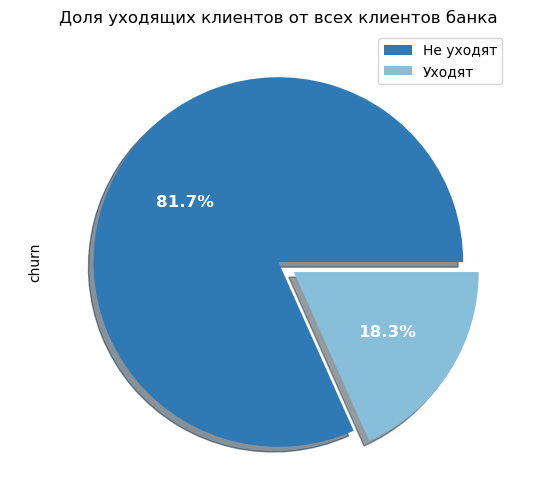

In [51]:
#Построим круговую диаграму по доле уходящих от общей доли клиентов банка:
plt.figure(figsize=(6,6))

with sns.color_palette("RdBu_r"):
    new_data.churn.map({True:'Уходят',False:'Не уходят'}).value_counts()\
        .plot.pie(legend=True, 
                   autopct='%1.1f%%', explode=(0, 0.1), \
                   shadow=True, startangle=0, textprops={'fontsize':12, 'color': 'white', 'fontweight': 'bold'})
plt.title('Доля уходящих клиентов от всех клиентов банка', fontsize=12)
plt.show()

In [52]:
# Также построим табличку с подсчетом значений столбца churn, сколько всего уходит и сколько остается:
clients = new_data['churn'].value_counts()
clients_table = (clients.to_frame(name='bank_clients')).reset_index()
clients_table.rename(columns={'index': 'churn value'}, inplace=True)
clients_table

,churn value,bank_clients
0,False,8104
1,True,1818


**Вывод:**
* Из банка собирается уходить 18,3% клиентов или 1818 человек. 
* Ситуация тревожная, почти одна пятая всех клиентов подала заявление о расторжении. Необходимо узнать о них побольше.

#### Анализ кредитного скоринга

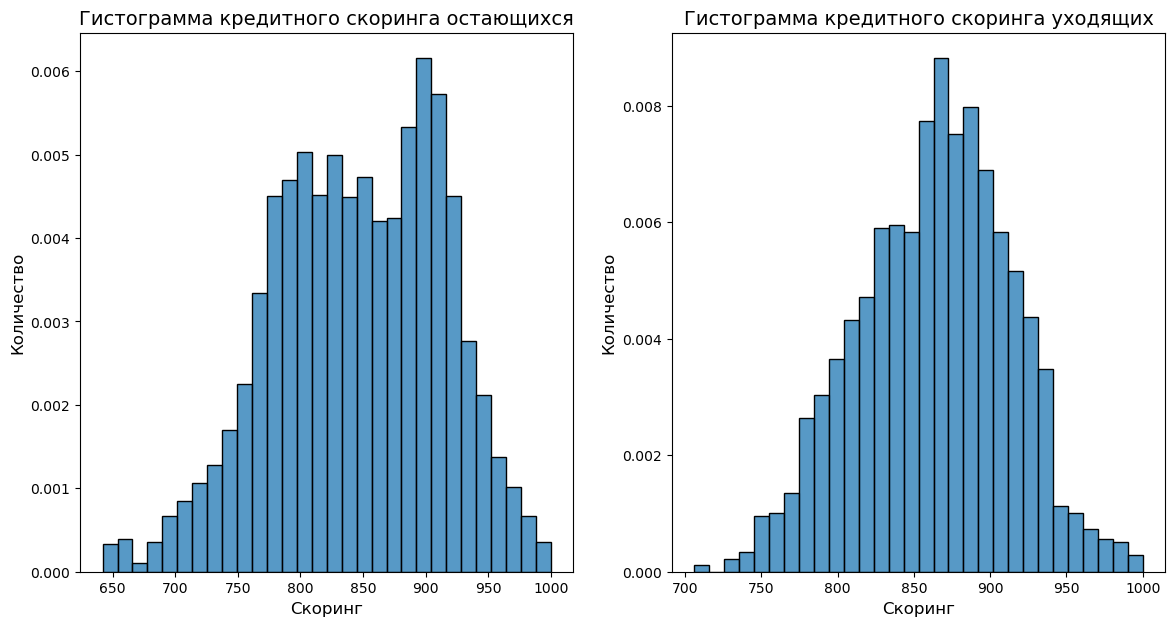

In [53]:
# Построение гистограмм распределения клиентов по скорингу
plt.figure(figsize=(14,7))

plt.subplot2grid((1,2),(0,0))
with sns.color_palette("tab10"):
    sns.histplot(x='score', data=new_data_remained, bins=30, stat='density', label='Анализ')
plt.title('Гистограмма кредитного скоринга остающихся', fontsize=14)
plt.xlabel('Скоринг', fontsize=12)
plt.ylabel('Количество', fontsize=12)


plt.subplot2grid((1,2),(0,1))
with sns.color_palette("tab10_r"):
    sns.histplot(x='score', data=new_data_churn, bins=30, stat='density', label='Анализ')
plt.title('Гистограмма кредитного скоринга уходящих', fontsize=14)
plt.xlabel('Скоринг', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.show()

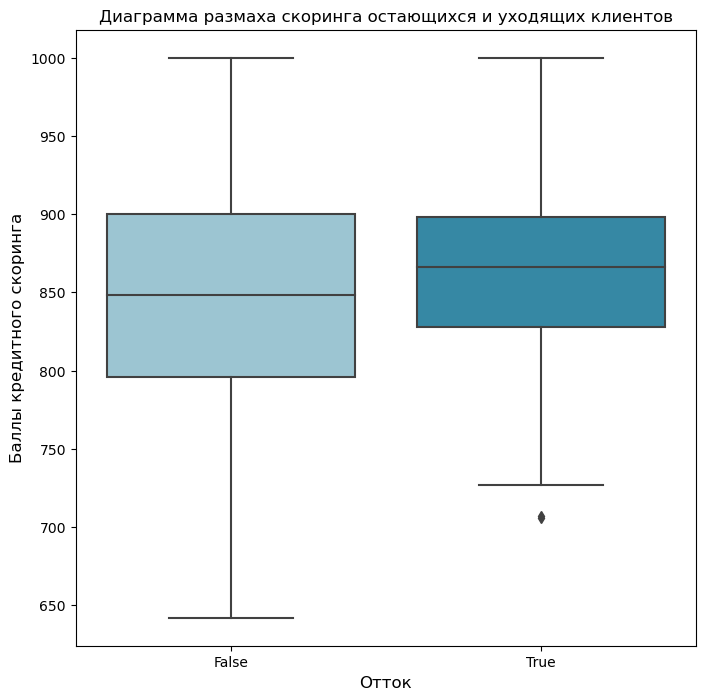

Средний арифметический балл скоринга остающихся: 845.0
Cредний арифметический балл скоринга уходящих: 863.0



AttributeError: 'int' object has no attribute 'round'

In [54]:
# Диаграмма размаха скоринга остающихся и уходящих:
plt.figure(figsize=(8,8))
with sns.color_palette("ocean_r"):
    sns.boxplot(y='score', x='churn',data=new_data)
plt.title('Диаграмма размаха скоринга остающихся и уходящих клиентов', fontsize=12)
plt.ylabel('Баллы кредитного скоринга', fontsize=12)
plt.xlabel('Отток', fontsize=12)
plt.show()

print('Средний арифметический балл скоринга остающихся:', new_data_remained['score'].mean().round(0))
print('Cредний арифметический балл скоринга уходящих:', new_data_churn['score'].mean().round(0))
print()
print('Минимальный балл скоринга остающихся:', new_data_remained['score'].min().round(0))
print('Минимальный балл скоринга уходящих:', new_data_churn['score'].min().round(0))
print()
print('Максимальный балл скоринга уходящих:', new_data_churn['score'].max().round(0))
print('Максимальный балл скоринга остающихся:', new_data_remained['score'].max().round(0))
print()
print('Перцентили для остающихся:', np.percentile (new_data_remained.score, [25, 50, 75]))
print('Перцентили для уходящих:', np.percentile (new_data_churn.score, [25, 50, 75]))

**Вывод:**
* Обе гистограммы кредитного скоринга близки к нормальному распределению.
* На гистограмме уходящих заметен всплеск клиентов с кредитным скорингом от 860 до 900 баллов.
* Диаграммы размаха дублируют информацию, но также акцентируют внимание на выбросе - аномально низком значении скоринга у кого-то из уходящих клиентов. 
* Средний арифметический скоринговый балл уходящих выше, чем у остающихся, 863 балла против 845.
* Минимальный балл уходящих также выше, 706 против 642.
* Максимальный балл обеих групп одинаковый.
* 25%-й перцентиль уходящих выше.
* Можно разделить скоринговые баллы уходящих на два основных диапазона - 750-860 и 861-950.
* В целом мы можем сделать вывод, что у уходящих клиентов довольно высокий кредитный скоринг. Значит, дело не в их возможной неплатежеспособности или неблагонадежности как заемщиков. Банк теряет ценных клиентов.


#### Анализ по городам

In [55]:
#Табличка по городам:
cities = new_data['city'].value_counts()
city_table = (cities.to_frame(name='total_clients')).reset_index()
city_table.rename(columns={'index': 'city'}, inplace=True)

city_table_churn = new_data_churn.groupby('city')['user_id'].count().reset_index().sort_values(by='user_id', ascending=False)
city_table_churn.rename(columns={'user_id': 'churn_clients'}, inplace=True)
city_res = city_table_churn.merge(city_table, on=["city"])
city_res['remained_clients'] = city_res['total_clients'] - city_res['churn_clients']
city_res = (city_res[['city', 'churn_clients', 'remained_clients', 'total_clients']]).reset_index(drop=True)
city_res


,city,churn_clients,remained_clients,total_clients
0,Ярославль,1117,4737,5854
1,Рыбинск,436,2216,2652
2,Ростов,265,1151,1416


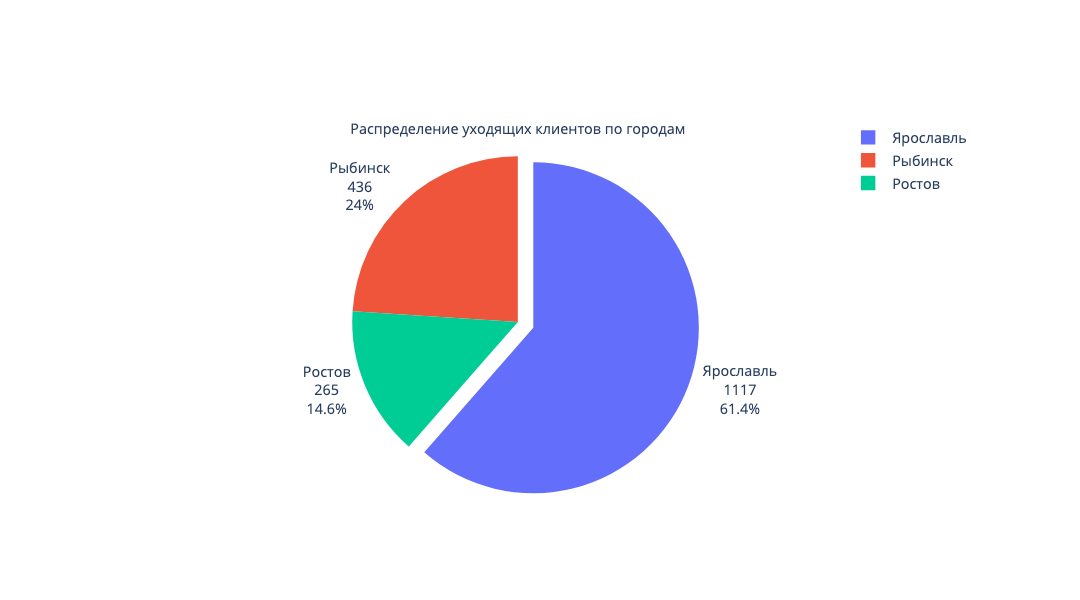

In [58]:
fig = go.Figure(go.Pie(
labels = city_res['city'],
values = city_res['churn_clients'], 
    title='Распределение уходящих клиентов по городам'))
fig.update_traces(textposition='outside', textinfo='percent+value+label', pull=[0.1,0.0])
pio.show(fig, renderer='png', width=900, scale=1.2)

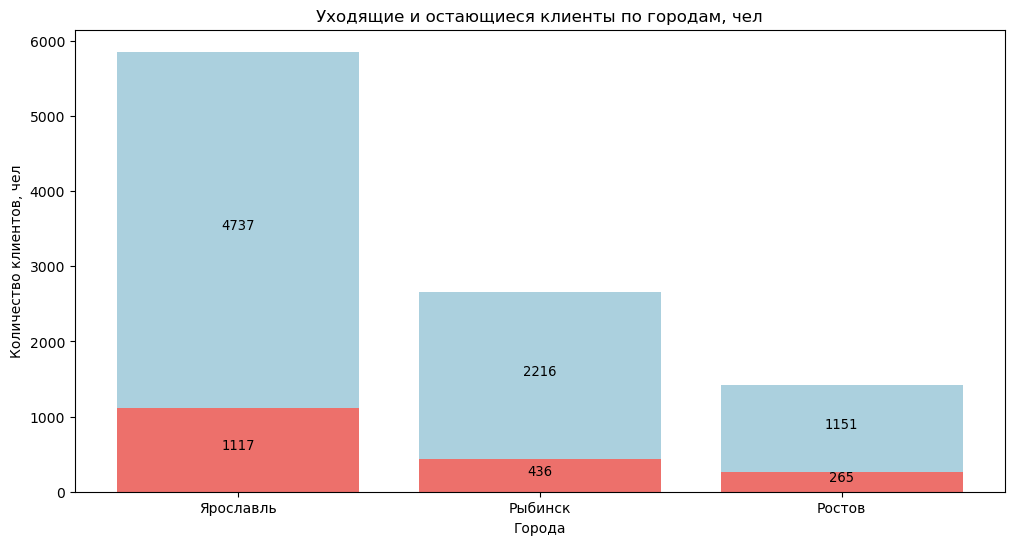

In [57]:
# Уходящие и остающиеся клиенты по городам в количественных значениях:
groups = city_res['city']
values1 = city_res['churn_clients']
values2 = city_res['remained_clients']

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax.bar(groups, values1, color = "#ed706b")
ax.bar(groups, values2, bottom = values1, color = "#abd0de")

# Labels
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = '#000000', size = 9.5)


ax.set_title('Уходящие и остающиеся клиенты по городам, чел')
ax.set_ylabel('Количество клиентов, чел')
ax.set_xlabel('Города')

plt.show()

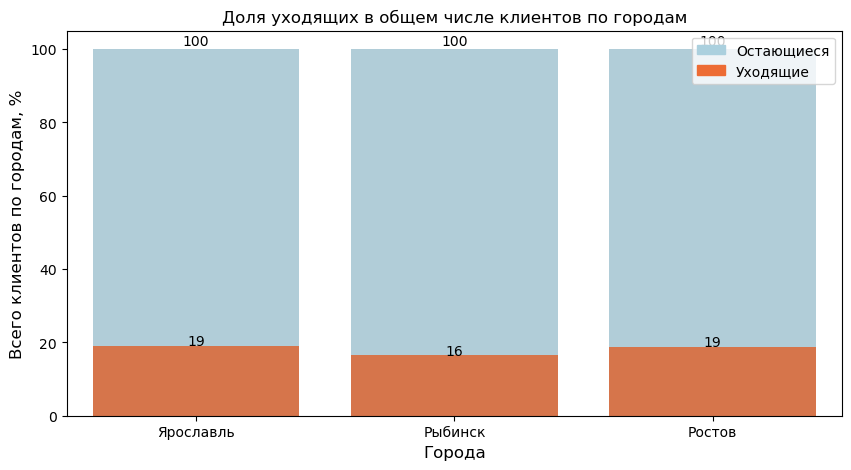

In [61]:
#Формула для отображения значений на графике:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

# размер графика
plt.figure(figsize=(10, 5))

# процентная доля, чтобы график был нагляднее при сравнении по городам:
city_res['share_churn'] = [i / j * 100 for i,j in zip(city_res['churn_clients'], city_res['total_clients'])]
city_res['share_total'] = [i / j * 100 for i,j in zip(city_res['total_clients'], city_res['total_clients'])]

# bar chart 1 -> общее количество клиентов по городам:
bar1 = sns.barplot(x="city",  y="share_total", data=city_res, color='#abd0de')

# bar chart 2 -> доля уходящих клиентов по городам:
bar2 = sns.barplot(x="city", y="share_churn", data=city_res, color='#ed6c34')
show_values(bar2)
# настраиваем график
top_bar = mpatches.Patch(color="#abd0de", alpha=1, label='Остающиеся')
bottom_bar = mpatches.Patch(color='#ed6c34', alpha=1, label='Уходящие')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Города", size = 12)
plt.ylabel("Всего клиентов по городам, %", size = 12)
plt.title('Доля уходящих в общем числе клиентов по городам')
# show the graph
plt.show()

**Вывод:**
* Больше всего всех клиентов банка из Ярославля, далее идет Рыбинск, на третьем месте - Ростов.
* По доле клиентов внутри города из Ярославля и Ростова уходит по 19% клиентов. Из Рыбинска - 16%.
* Из 1818 уходящих из банка клиентов 1117 - из Ярославля, т.е. 61,4%. Доля уходящих клиентов из Рыбинска - 24% от всех уходящих. Из Ростова - 14,6%. Учтем это в будущем при составлении портрета уходящего клиента.

#### Анализ по полу

In [62]:
# Построим табличку с подсчетом представителей мужского и женского пола среди остающихся и уходящих:
gender_table = new_data['gender'].value_counts()
gender_table = (gender_table.to_frame(name='total_clients')).reset_index()
gender_table.rename(columns={'index': 'gender'}, inplace=True)
gender_table['churn_clients'] = new_data_churn['gender_1_0'].value_counts()
gender_table['remained_clients'] = gender_table['total_clients'] - gender_table['churn_clients']
gender_table = (gender_table[['gender', 'churn_clients', 'remained_clients', 'total_clients']]).reset_index(drop=True)
gender_table

,gender,churn_clients,remained_clients,total_clients
0,М,1183,3787,4970
1,Ж,635,4317,4952


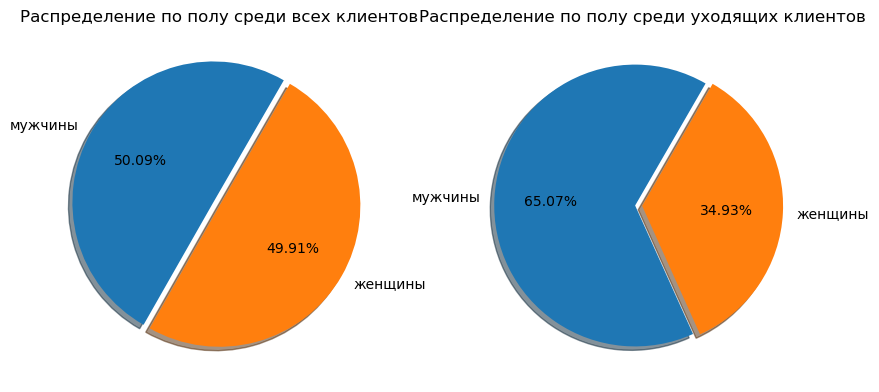

In [64]:
# Строим две диаграммы по полу в одном:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(121)

# Распределение по полу среди всех клиентов:
ax1.pie(gender_table['total_clients'],
            labels=['мужчины', 'женщины'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
plt.title('Распределение по полу среди всех клиентов')


ax2 = fig.add_subplot(122)

# Распределение по полу среди уходящих
ax2.pie(gender_table['churn_clients'],
        labels=['мужчины', 'женщины'],
        autopct='%1.2f%%',
        shadow=True,
        explode=(0.05, 0),
        startangle=60)
plt.title('Распределение по полу среди уходящих клиентов')
plt.show()

**Вывод:**
* Клиенты банка в целом распределены по полу равномерно - 50 на на 50%.
* Среди уходящих доля мужчин существенно выше, чем женщин - 65% против 34.9%.
* Из данных показателей делаем вывод, что уходят преимущественно мужчины.

#### Анализ по возрасту

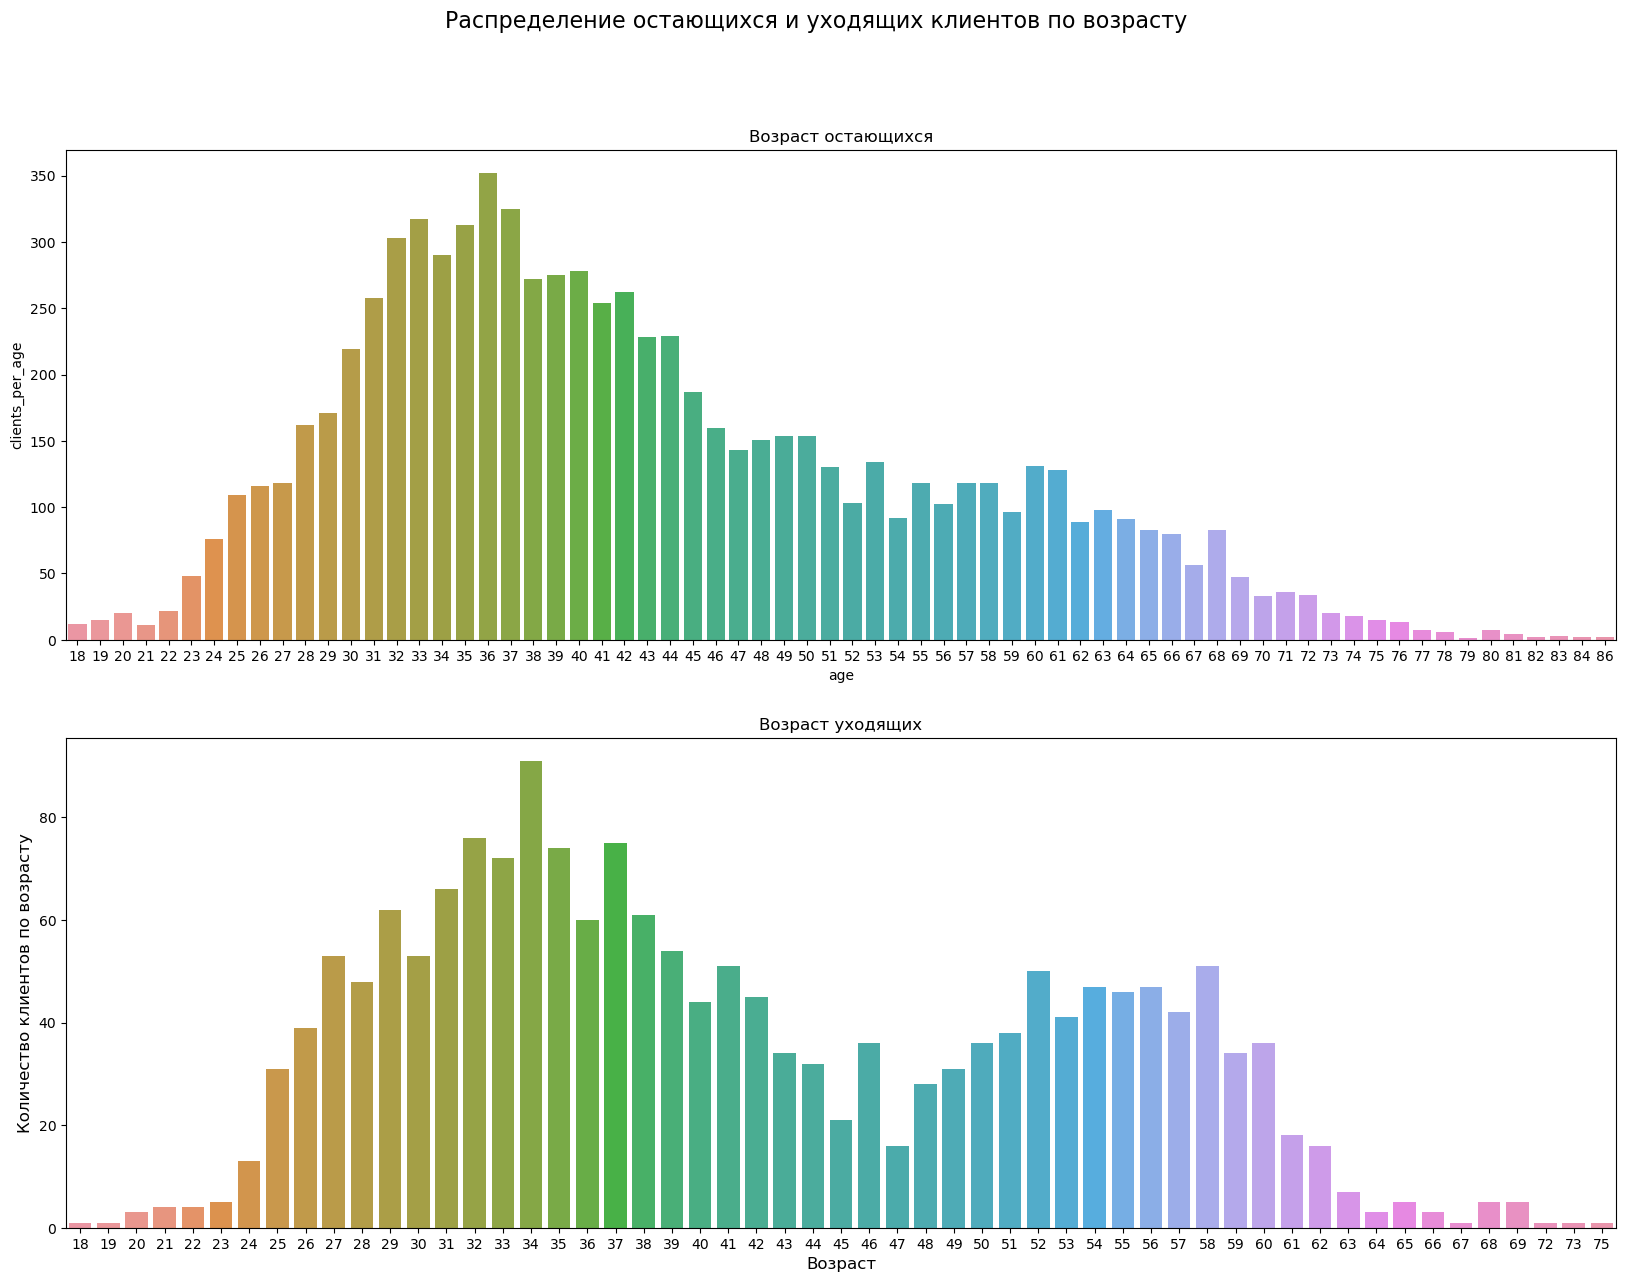

In [65]:
# Посмотрим распределение уходящих клиентов по возрасту:

plot_data_remained = new_data_remained['age'].value_counts().reset_index().rename(columns={
    'index':'age', 'age':'clients_per_age'}).sort_values(by='age')

plot_data_churn = new_data_churn['age'].value_counts().reset_index().rename(columns={
    'index':'age', 'age':'clients_per_age'}).sort_values(by='age')


#Строим сетку из графиков с помощью Seaborn:
fig, axes = plt.subplots(2, 1, figsize=(20, 14), sharex=False)
fig.suptitle('Распределение остающихся и уходящих клиентов по возрасту', size=16)
sns.barplot(data=plot_data_remained, x='age', y='clients_per_age', ax=axes[0]).set(title='Возраст остающихся')


ax1 = sns.barplot(data=plot_data_churn, x='age', y='clients_per_age', ax=axes[1]).set(title='Возраст уходящих')
#plt.axhline(y=new_data_churn['age'].mean(), color='red', linestyle='--', label='Средний возраст уходящих')
plt.xlabel("Возраст", size = 12)
plt.ylabel("Количество клиентов по возрасту", size = 12)
plt.show()


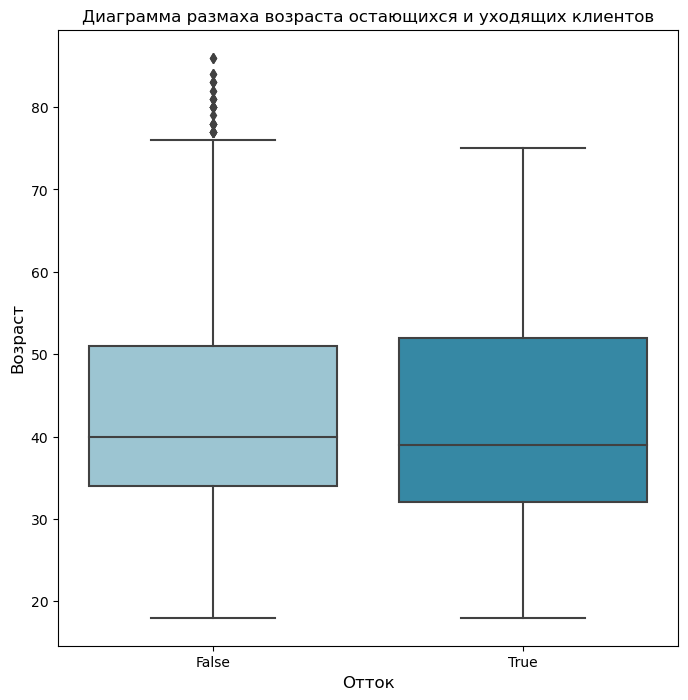

Средний возраст остающихся: 43.0
Cредний возраст уходящих: 41.4

Минимальный возраст остающихся: 18
Минимальный возраст уходящих: 18

Максимальный возраст уходящих: 75
Максимальный возраст остающихся: 86

Перцентили для остающихся: [34. 40. 51.]
Перцентили для уходящих: [32. 39. 52.]


In [70]:
# Диаграмма размаха скоринга остающихся и уходящих:
plt.figure(figsize=(8,8))
with sns.color_palette("ocean_r"):
    sns.boxplot(y='age', x='churn',data=new_data)
plt.title('Диаграмма размаха возраста остающихся и уходящих клиентов', fontsize=12)
plt.ylabel('Возраст', fontsize=12)
plt.xlabel('Отток', fontsize=12)
plt.show()

print('Средний возраст остающихся:', new_data_remained['age'].mean().round(1))
print('Cредний возраст уходящих:', new_data_churn['age'].mean().round(1))
print()
print('Минимальный возраст остающихся:', round(new_data_remained['age'].min()))
print('Минимальный возраст уходящих:', round(new_data_churn['age'].min()))
print()
print('Максимальный возраст уходящих:', round(new_data_churn['age'].max()))
print('Максимальный возраст остающихся:', round(new_data_remained['age'].max()))
print()
print('Перцентили для остающихся:', np.percentile (new_data_remained.age, [25, 50, 75]))
print('Перцентили для уходящих:', np.percentile (new_data_churn.age, [25, 50, 75]))

**Вывод:**
* Обе гистограммы распределения (радужные) смещены относительно нормального распределения. Мы видим, как среди остающихся преобладает смещение влево, то есть среди клиентов банка больше всего экономически активного населения в трудоспособном возрасте.
* У гистограммы уходящих есть явный пик - 34 года, и в целом гистограмма состоит из двух "волн".
* Самая мощная волна среди уходящих приходится на две категории возраст от 25 до 44 лет.
* Вторая, чуть менее высокая, но более вытянутая волна - от 48 до 60 лет.
* Что касается диаграмм размаха, здесь нам наиболее интересно отличие в перцентилях и среднем арифметическом возрасте уходящих и остающихся. Получается, средний возраст уходящих чуть ниже, возможно, из-за отстутсвия выбросов, характерных для остающихся, в виде клиентов старше 75 лет.
* Минимальный возраст обеих групп одинаковый, 18 лет.
* Максимальный возраст уходящих ниже, чем остающихся - 75 против 86.
* 25-й перцентиль (и остальные тоже) показывает, что аудитория уходящих клиентов в целом моложе, чем остающиеся.
* Волны гистограмм позволяют нам для дальнейшего исследования разделить **возраст уходящих на следующие категории: 18-24, 25-34, 35-44, 45-60 и 61+ лет.**

#### Анализ по оценке собственности

In [71]:
#Табличка по городам:
equities = new_data['equity'].value_counts()
equity_table = equities.to_frame(name='total_clients').reset_index()
equity_table.rename(columns={'index': 'equity_score'}, inplace=True)
equity_table = equity_table.sort_values(by='equity_score', ascending=True).reset_index(drop=True)

equity_table_churn = new_data_churn.groupby('equity')['user_id'].count().reset_index().sort_values(by='equity', ascending=True)
equity_table_churn.rename(columns={'equity': 'equity_score', 'user_id': 'churn_clients'}, inplace=True)
equity_table_churn = equity_table_churn.reset_index(drop=True)

equity_res = equity_table_churn.merge(equity_table, on=["equity_score"])
equity_res['remained_clients'] = equity_res['total_clients'] - equity_res['churn_clients']
equity_res = (equity_res[['equity_score', 'churn_clients', 'remained_clients', 'total_clients']]).reset_index(drop=True)
equity_res


,equity_score,churn_clients,remained_clients,total_clients
0,0,90,2464,2554
1,1,93,678,771
2,2,166,880,1046
3,3,321,1210,1531
4,4,464,1377,1841
5,5,576,1333,1909
6,6,58,103,161
7,7,37,42,79
8,8,6,11,17
9,9,7,6,13


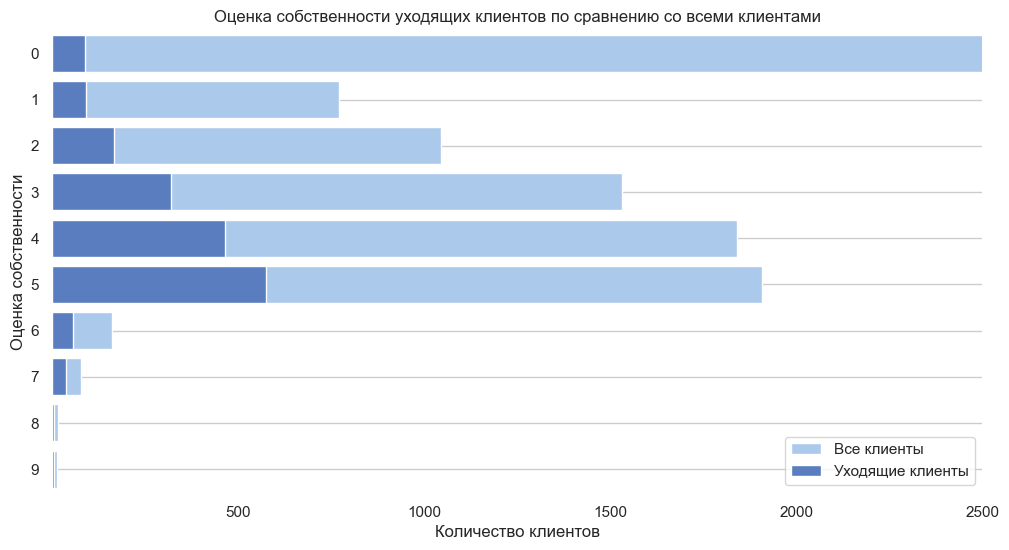

In [74]:

#Построим горизонтальный барплот для анализа оценок собственности:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 6))
sns.set_color_codes("pastel")

sns.barplot(x="total_clients", y="equity_score", data=equity_res,
            label="Все клиенты", color="b", orient='h')

sns.set_color_codes("muted")
sns.barplot(x="churn_clients", y="equity_score", data=equity_res,
            label="Уходящие клиенты", color="b", orient='h')

# Добавим легенду и подписи, ограничим ось x:
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(ylabel="Оценка собственности", xlabel="Количество клиентов", title='Оценка собственности уходящих клиентов по сравнению со всеми клиентами')
ax.grid()

ax.set_xlim(1,2500)
sns.despine(left=True, bottom=True)
plt.show()

**Вывод:**
* Среди уходящих клиентов преобладают оценки 5, 4, 3. С оценкой 5 - 31% уходящих, 4 - 25,5%, 3 - 17,6%. 
* Среди остающихся с существенным отрывом лидирует оценка 1, далее идут 5 и 4.
* Оценки 9,8 почти не встречаются. Но уходит практически половина клиентов с оценками 6 и 7.
* Можем сделать вывод, что уходят достаточно обеспеченные клиенты. Они наверняка продолжат пользоваться банковскими услугами и продуктами в силу своего финансового положения, но уже с другим банком.

#### Анализ по балансу на счете

In [75]:
# Сделаем срез данных без заглушек в балансе, т.е. balance >=0:
new_data_balance = new_data.query("balance >= 0")

# Проверим, что строки с заглушками '-1' исключены:
new_data_balance.shape

(7663, 16)

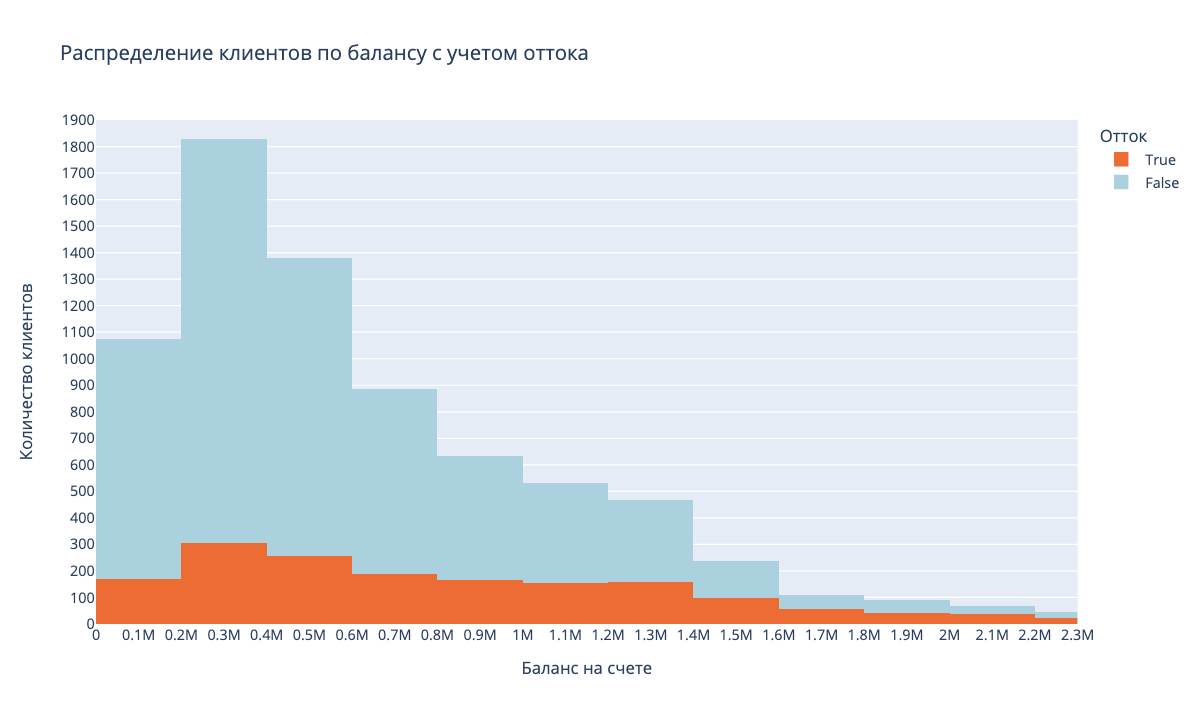

In [77]:
# Строим гистограмму распределения клиентов по балансу:
fig = px.histogram(new_data_balance, x='balance', color="churn", color_discrete_map = {0:'#abd0de',1:'#ed6c34'},
                   width=1000, height=600, labels={"balance": "Баланс на счете", "churn": "Отток"},
                title="Распределение клиентов по балансу с учетом оттока")
fig.update_xaxes(tick0=0, dtick=100000,  range=(0, 2300000))
fig.update_yaxes(tick0=0, dtick=100,  range=(0,1900))
fig.update_layout(xaxis_title='Баланс на счете',
                   yaxis_title='Количество клиентов') 
pio.show(fig, renderer='png', width=1000, scale=1.2)

In [78]:
#Датафрейм с уходящими клиентами и без заглушки баланса ""-1":
new_data_balance_churn = new_data_churn.query("balance >= 0")

#Датафрейм с остающимися клиентами и без заглушки баланса ""-1":
new_data_balance_remained = new_data_remained.query("balance >= 0")

In [80]:
print('Средний баланс остающихся:', new_data_balance_remained['balance'].mean().round(1))
print('Cредний баланс уходящих:', new_data_balance_churn['balance'].mean().round(1))
print()
print('Минимальный баланс остающихся:', round(new_data_balance_remained['balance'].min()))
print('Минимальный баланс уходящих:', round(new_data_balance_churn['balance'].min()))
print()
print('Максимальный баланс остающихся:', round(new_data_balance_remained['balance'].max()))
print('Максимальный баланс уходящих:', round(new_data_balance_churn['balance'].max()))
print()
print('Перцентили для остающихся:', np.percentile(new_data_balance_remained.balance, [25, 50, 75]))
print('Перцентили для уходящих:', np.percentile(new_data_balance_churn.balance, [25, 50, 75]))
print()
print('Суммарный баланс остающихся:', new_data_balance_remained['balance'].sum().round(0))
print('Суммарный баланс уходящих:', new_data_balance_churn['balance'].sum().round(0))
print('Суммарный баланс всех клиентов:', new_data_balance['balance'].sum().round(0))
print('Доля баланса уходящих от суммарного баланса всех клиентов, %:', ((new_data_balance_churn['balance'].sum().round(0) / new_data_balance['balance'].sum().round(0))*100).round(0))


Средний баланс остающихся: 733828.1
Cредний баланс уходящих: 1134457.7

Минимальный баланс остающихся: 0
Минимальный баланс уходящих: 6

Максимальный баланс остающихся: 119113552
Максимальный баланс уходящих: 64866210

Перцентили для остающихся: [279004. 475354. 853826.]
Перцентили для уходящих: [ 387481.75  783908.5  1348127.  ]

Суммарный баланс остающихся: 4298031286
Суммарный баланс уходящих: 2048830655
Суммарный баланс всех клиентов: 6346861941
Доля баланса уходящих от суммарного баланса всех клиентов, %: 32.0


**Вывод:**
* Гистограмма распределения демонстрирует, что среди остающихся и среди уходящих баланс на счете преимущественно 200-300 тыс. руб.
* Чуть меньше клиентов с балансом 400-500 тыс., на почетном третьем месте - баланс 600-700 тыс. руб.
* Средний арифметический баланс уходящих существенно выше, чем остающихся - 1 134 457 руб. против 733 тыс руб. 
* Это не аномалия, так как медиана (50-й перцентиль) показывает примерно такую же разницу между уходящими - 783 тыс и остающимися - 475 тыс. руб.
* Максимальный баланс уходящего клиента - 64,8 млн. рублей. Остающегося - 119,1 млн. руб.
* 25-й перцентиль показывает, что в основном уходят клиенты с балансом существенно больше - 387 тыс. против 279 тыс. руб.
* Доля баланса уходящих от суммарного баланса всех клиентов - 32%.
* Банк теряет обеспеченных клиентов с живыми деньгами, а значит, и собственную ликвидность.

#### Анализ по количеству используемых продуктов 

In [81]:
#Посмотрим теперь на распределение заведений разных районов по категориям:
by_products = new_data.groupby(['products', 'churn'])['user_id'].count().reset_index().sort_values(by='products', ascending=True)
by_products = by_products.reset_index(drop=True)
by_products

,products,churn,user_id
0,1,False,3071
1,1,True,235
2,2,False,4117
3,2,True,978
4,3,False,731
5,3,True,297
6,4,False,174
7,4,True,300
8,5,False,11
9,5,True,8


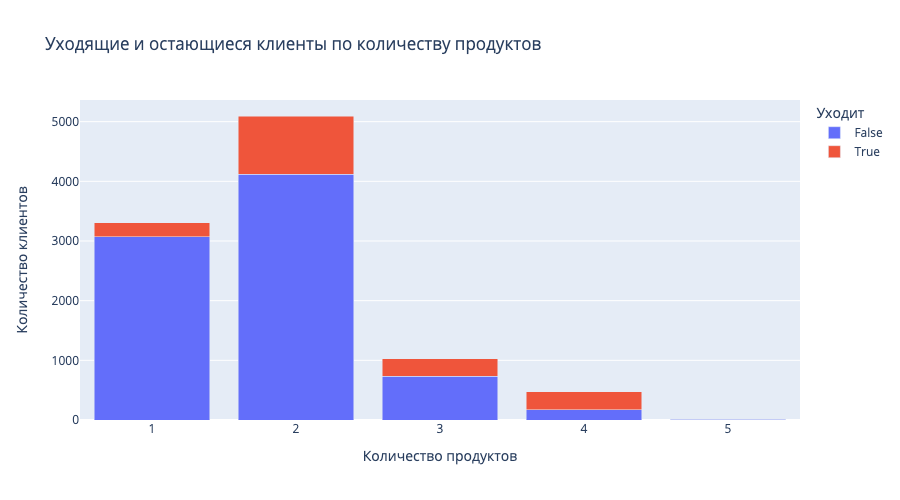

In [83]:
fig = px.bar(by_products, x="products", y="user_id", color="churn",
            hover_data=['churn'], barmode = 'stack', title="Уходящие и остающиеся клиенты по количеству продуктов",
            labels={"products": "Продуктов", 'user_id':'Клиентов', 'churn': 'Уходит'})
fig.update_layout(xaxis_title='Количество продуктов',
                 yaxis_title='Количество клиентов') 
pio.show(fig, renderer='png', width=900, scale=1)

**Вывод:**
* Большинство клиентов использует 2 продукта. Это характерно и для уходящих, 978 клиентов с 2 продуктами покидают банк, это 53,7% от всех уходящих (1818 чел).
* Больше половины клиентов с 4 продуктами также уходят - 300 клиентов или 16,5% среди всехо уходящих. Остаются 174 клиента с 4 продуктами.
* Банк теряет активных клиентов в плане использования банковских продуктов.

#### Анализ по наличию / отсутствию кредитной карты

In [84]:
#Собираем таблицу по наличию / отсутствию кредитной карты среди уходящих:
by_credit_cards = new_data_churn.groupby(['credit_card', 'churn'])['user_id'].count().reset_index().sort_values(by='credit_card', ascending=True)
by_credit_cards = by_credit_cards.reset_index(drop=True)
by_credit_cards

,credit_card,churn,user_id
0,False,True,815
1,True,True,1003


In [85]:
#Собираем таблицу по наличию / отсутствию кредитной карты среди всех клиентов:
all_by_credit_cards = new_data.groupby(['credit_card'])['user_id'].count().reset_index().sort_values(by='credit_card', ascending=True)
all_by_credit_cards = all_by_credit_cards.reset_index(drop=True)
all_by_credit_cards

,credit_card,user_id
0,False,3174
1,True,6748


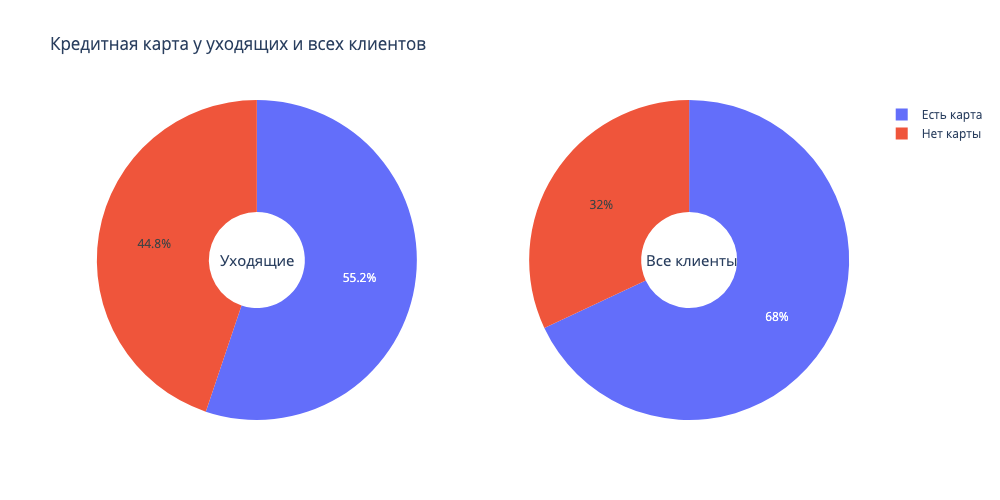

In [87]:
# Круговые диаграммы по кредитным картам у уходящих и всех клиентов:
labels = ['Нет карты', 'Есть карта']
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=by_credit_cards['user_id'], name="Кредитка у уходящих"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=all_by_credit_cards['user_id'], name="Кредитка у всех"),
              1, 2)
fig.update_traces(hole=.3, hoverinfo="label+percent+value")

fig.update_layout(
    title_text="Кредитная карта у уходящих и всех клиентов",
    # Аннотация 
    annotations=[dict(text='Уходящие', x=0.175, y=0.5, font_size=15, showarrow=False),
                 dict(text='Все клиенты', x=0.84, y=0.5, font_size=15, showarrow=False)])
pio.show(fig, renderer='png', width=1000, scale=1)

**Вывод:**
* Среди уходящих клиентов больше половины (55%) пользуются кредитной картой.
* Доля использующих кредитную карту среди всех клиентов - 68%.

#### Анализ по активности клиентов

In [88]:
#Собираем таблицу по активности клиентов:
by_activity = new_data.groupby(['last_activity', 'churn'])['user_id'].count().reset_index().sort_values(by='last_activity', ascending=False)
by_activity = by_activity.reset_index(drop=True)
by_activity

,last_activity,churn,user_id
0,True,False,3916
1,True,True,1277
2,False,False,4188
3,False,True,541


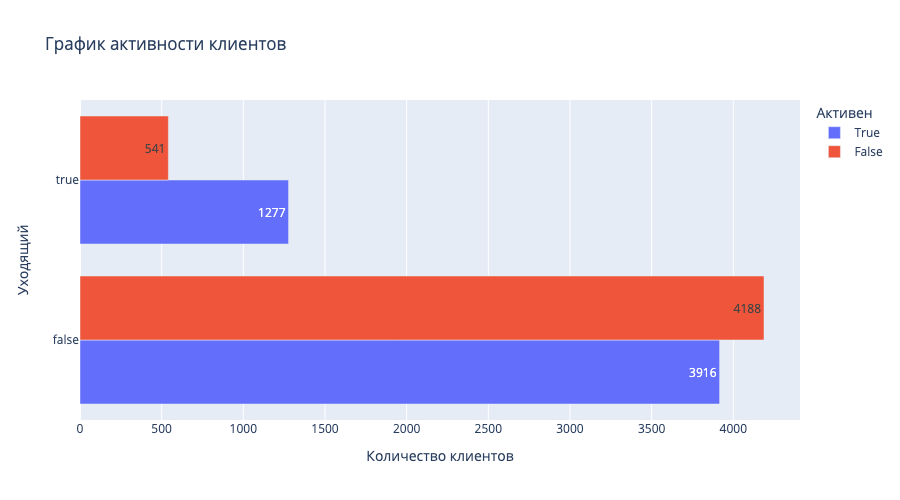

In [89]:
#График активности клиентов
fig = px.bar(
    by_activity,
    x="user_id",
    y="churn",
    color='last_activity',
    title="График активности клиентов",
    barmode="group",
    text="user_id",
    hover_name="last_activity",
    labels={"last_activity": "Активен", 'user_id':'Клиентов', 'churn': 'Уходит'}
)
fig.update_layout(xaxis_title='Количество клиентов',
                   yaxis_title='Уходящий') 
pio.show(fig, renderer='png', width=900, scale=1)

**Вывод:**
* Любопытно, что среди уходящих неактивных клиентов 541, а активных почти в 2,5 раза больше - 1277 человек. То есть это уход не по естественным и неизбежным причинам (смерть, тяжелая болезнь и пр.), а по собственной инициативе. Т.е. 70% уходящих клиентов активны.
* Тревожно, что среди остающихся клиентов активных лишь 51,6%.

#### Анализ по примерной зарплате

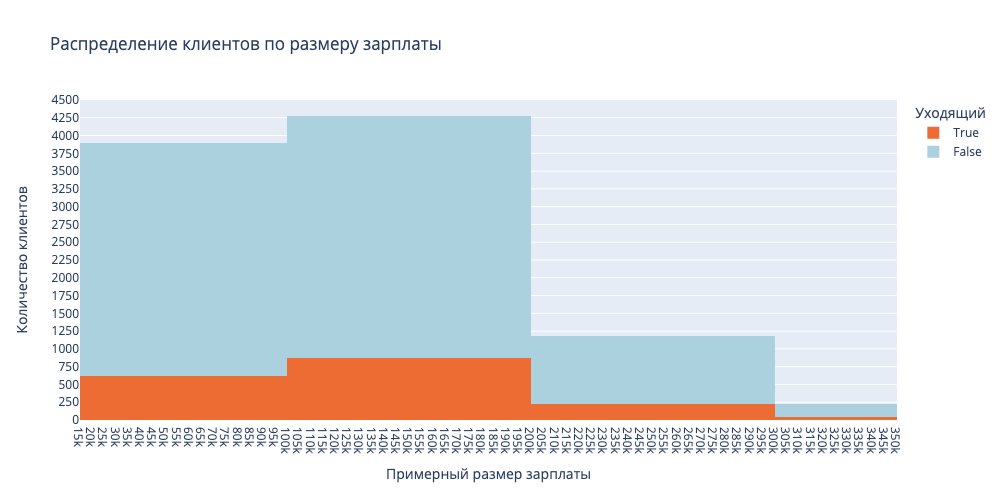

In [91]:
fig = px.histogram(new_data, x="est_salary", nbins=20, color="churn", 
                   color_discrete_map = {0:'#abd0de',1:'#ed6c34'}, width=1000, height=500, 
                   labels={"est_salary": "Зарплата", 'churn':'Уходящий'},
                title="Распределение клиентов по размеру зарплаты")
fig.update_xaxes(tick0=0, dtick=5000,  range=(15000, 350000))
fig.update_yaxes(tick0=0, dtick=250,  range=(0,4500))
fig.update_layout(xaxis_title='Примерный размер зарплаты',
                   yaxis_title='Количество клиентов') 
pio.show(fig, renderer='png', width=1000, scale=1)

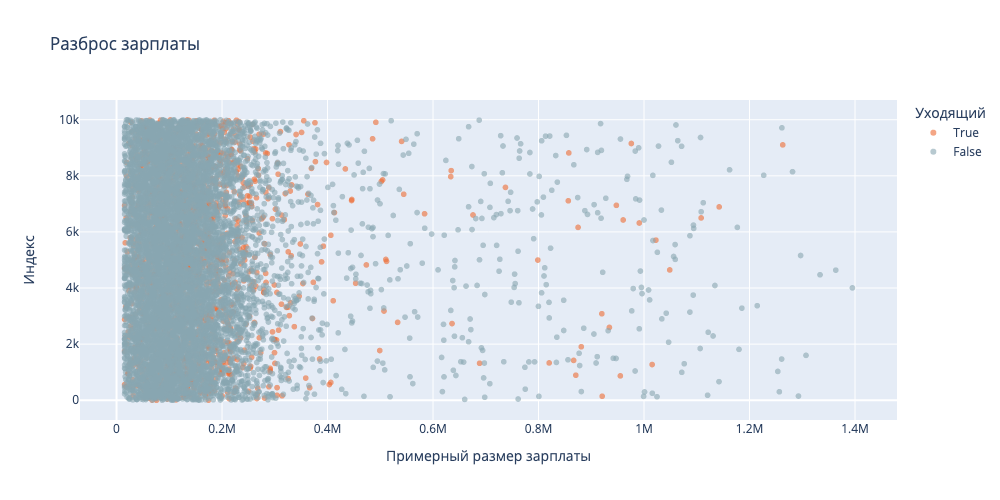

In [93]:
#Взглянем также на разброс зарплат с точки зрения явно выделяющихся.
fig = px.scatter(new_data, x='est_salary', color='churn', opacity=0.6, 
                 color_discrete_sequence=['#ed6c34', '#88a6b1'], title="Разброс зарплаты",
                 labels={"est_salary": "Зарплата", 'churn':'Уходящий'})
fig.update_layout(xaxis_title='Примерный размер зарплаты',
                   yaxis_title='Индекс') 
pio.show(fig, renderer='png', width=1000, scale=1)

In [95]:
print('Средняя зарплата остающихся:', new_data_remained['est_salary'].mean().round(0))
print('Cредняя зарплата уходящих:', new_data_churn['est_salary'].mean().round(0))
print()
print('Минимальная зарплата остающихся:', round(new_data_remained['est_salary'].min()))
print('Минимальная зарплата уходящих:', round(new_data_churn['est_salary'].min()))
print()
print('Максимальная зарплата остающихся:', round(new_data_remained['est_salary'].max()))
print('Максимальная зарплата уходящих:', round(new_data_churn['est_salary'].max()))
print()
print('Перцентили для остающихся:', np.percentile (new_data_remained.est_salary, [25, 50, 75]))
print('Перцентили для уходящих:', np.percentile (new_data_churn.est_salary, [25, 50, 75]))

Средняя зарплата остающихся: 147825.0
Cредняя зарплата уходящих: 148360.0

Минимальная зарплата остающихся: 15279
Минимальная зарплата уходящих: 15279

Максимальная зарплата остающихся: 1395064
Максимальная зарплата уходящих: 1263028

Перцентили для остающихся: [ 73486.5  118248.   174105.25]
Перцентили для уходящих: [ 83285.  125408.5 176017.5]


**Вывод:**
* На первом графике мы видим ступенчатое распределение клиентов по размеру зарплаты.
* Больше всего уходящих с зарплатой в диапазоне 100-200 тыс., на 2-м месте диапазон 15-100 тыс, а на 3-м - 200-300 тыс. 
* Среди остающихся диапазон зарплат идентичен уходящим, но также среди остающихся больше тех, у кого зарплата превышает 300 тыс. рублей.
* На графике разброса зарплаты мы видим, большинство зарплат - до 200 тыс. рублей, но есть и те, у кого зарплата достигает 1,4 млн рублей (остающийся клиент), и уходящий клиент с зарплатой больше 1,2 млн рублей.
* Средняя арифметическая зарплата остающихся и уходящих не сильно отличается, +- 148 тыс. рублей.
* Минимальная зарплата идентична МРОТ, максимальная чуть выше у остающихся - 1,39 млн. рублей против 1,26 млн рублей.
* Интересно взглянуть на перцентили, большинство зарплат уходящих лежит в диапазоне выше, чем у остающихся: от 83 тыс до 176 тыс рублей по сравнению с лояльными клиентами, у которых нижняя граница 25% равна 73 тыс. руб.
* По итогам изучения распределения зарплат мы составим **следующую градацию (в тыс. руб): 15-100, 101-150, 150-200, 201-300, 301-400, 401+.**

#### Промежуточный вывод по всем признакам:

**Вывод:**
* Из банка собирается уходить 18,3% клиентов или 1818 человек. 
* Скоринговые баллы уходящих, два основных диапазона - 750-860 и 861-950.
* Средний арифметический балл скоринга остающихся - 845,  уходящих -  863.
* Минимальный балл скоринга остающихся - 642, уходящих - 706.
* Из всех уходящих 61,4% - Ярославль, 24% - Рыбинск, 14,6% - Ростов.
* Среди уходящих доля мужчин существенно выше, чем женщин - 65% против 34.9%.
* Возрастной пик уходящих - 34 года. Два основных диапазона уходящих: 25-34 и 35-44.
* Средний возраст уходящих - 41,4 года. Остающихся - 43 года.
* Среди уходящих клиентов преобладают оценки собственности 5, 4, 3. С оценкой 5 - 31% уходящих, 4 - 25,5%, 3 - 17,6%. 
* Среди остающихся и среди уходящих баланс на счете преимущественно 200-300 тыс. руб, на втором месте - 400-500 тыс. руб.
*  Средний арифметический баланс уходящих существенно выше, чем остающихся - 1 134 457 руб. против 733 тыс руб.
* Доля баланса уходящих от суммарного баланса всех клиентов банка - 32%.
* Большинство клиентов использует 2 продукта.
* 53,7%  уходящих использует 2 продукта. 16,5% - три продукта.
*  Среди уходящих клиентов больше половины (55%) пользуются кредитной картой.
*  Доля использующих кредитную карту среди всех клиентов - 68%.
* 70% уходящих клиентов активны. Среди остающихся активны лишь 51,6% клиентов.
* Больше всего уходящих с зарплатой в диапазоне 100-200 тыс., на 2-м месте диапазон 15-100 тыс, а на 3-м - 200-300 тыс.
*  Средняя арифметическая зарплата остающихся и уходящих не сильно отличается, +- 148 тыс. рублей.


### Построение и анализ матрицы корреляции признаков к оттоку.

In [96]:
#Дублируем наш обновленный после предобработки датафрейм для дальнейшего исследования корреляции:
corr_data = new_data
corr_data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_1_0
0,183012,850,Рыбинск,Ж,25,1,59214,2,False,True,75719,True,0,1,0,1
1,146556,861,Рыбинск,Ж,37,5,850594,3,True,False,86621,False,0,1,0,1
2,120722,892,Рыбинск,Ж,30,0,-1,1,True,True,107683,False,0,1,0,1
3,225363,866,Ярославль,Ж,51,5,1524746,2,False,True,174423,True,0,0,1,1
4,157978,730,Ярославль,М,34,5,174,1,True,False,67353,True,0,0,1,0


In [97]:
corr_data.shape

(9922, 16)

In [98]:
# Создаем столбец с категориями возраста, которые мы выделили в ходе исследования признаков:
corr_data.insert(16, 'age_range', 0) 
def age(age):
    if age <= 24:
        return '18-24'
    elif age <= 34:
        return '25-34'
    elif age <= 44:
        return '35-44'  
    elif age <= 60:
        return '45-60'
    else:
        return '61-99'   


corr_data['age_range'] = corr_data['age'].apply(age)
corr_data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_1_0,age_range
0,183012,850,Рыбинск,Ж,25,1,59214,2,False,True,75719,True,0,1,0,1,25-34
1,146556,861,Рыбинск,Ж,37,5,850594,3,True,False,86621,False,0,1,0,1,35-44
2,120722,892,Рыбинск,Ж,30,0,-1,1,True,True,107683,False,0,1,0,1,25-34
3,225363,866,Ярославль,Ж,51,5,1524746,2,False,True,174423,True,0,0,1,1,45-60
4,157978,730,Ярославль,М,34,5,174,1,True,False,67353,True,0,0,1,0,25-34


In [99]:
# Создаем столбец с категориями зарплат, которые мы выделили в ходе исследования признаков:
#15-100, 101-150, 150-200, 201-300, 301-400, 401+

# добавляем столбец с категориями зарплаты 
corr_data.insert(17, 'salary_range', 0)
def income(income):  
    if income <= 100000:
        return '51-100'
    elif income <= 150000:
        return '101-150'
    elif income <= 200000:
        return '151-200'
    elif income <= 300000:
        return '201-300'
    elif income <= 400000:
        return '301-400'   
    else:
        return '401+'     
    

corr_data['salary_range'] = corr_data['est_salary'].apply(income)
corr_data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_1_0,age_range,salary_range
0,183012,850,Рыбинск,Ж,25,1,59214,2,False,True,75719,True,0,1,0,1,25-34,51-100
1,146556,861,Рыбинск,Ж,37,5,850594,3,True,False,86621,False,0,1,0,1,35-44,51-100
2,120722,892,Рыбинск,Ж,30,0,-1,1,True,True,107683,False,0,1,0,1,25-34,101-150
3,225363,866,Ярославль,Ж,51,5,1524746,2,False,True,174423,True,0,0,1,1,45-60,151-200
4,157978,730,Ярославль,М,34,5,174,1,True,False,67353,True,0,0,1,0,25-34,51-100


**Выполним оценку корреляции признаков, влияющих на отток клиентов:**
 

In [100]:
# Готовим табличку для матрицы корреляции:
#Кодируем возрастные диапазоны и диапазон зарплат:
dummies = pd.get_dummies(corr_data['age_range'], prefix='age_range')
dummies_s = pd.get_dummies(corr_data['salary_range'], prefix='salary_range')
dummies_g = pd.get_dummies(corr_data['gender'], prefix='gender_range')

#Кодируем оценку собственности по итогам анализа данного признака:
dummies_e = pd.get_dummies(new_data['equity'], prefix='equity')

corr_data = pd.concat([corr_data, dummies], axis=1)
corr_data = pd.concat([corr_data, dummies_s], axis=1)
corr_data = pd.concat([corr_data, dummies_g], axis=1)
corr_data = pd.concat([corr_data, dummies_e], axis=1)

#Убираем столбец user_id и equity для будущей матрицы:
corr_data_test = corr_data.drop(['user_id', 'equity'],axis = 1)
corr_data_test


,score,city,gender,age,balance,products,credit_card,last_activity,est_salary,churn,...,equity_0,equity_1,equity_2,equity_3,equity_4,equity_5,equity_6,equity_7,equity_8,equity_9
0,850,Рыбинск,Ж,25,59214,2,False,True,75719,True,...,0,1,0,0,0,0,0,0,0,0
1,861,Рыбинск,Ж,37,850594,3,True,False,86621,False,...,0,0,0,0,0,1,0,0,0,0
2,892,Рыбинск,Ж,30,-1,1,True,True,107683,False,...,1,0,0,0,0,0,0,0,0,0
3,866,Ярославль,Ж,51,1524746,2,False,True,174423,True,...,0,0,0,0,0,1,0,0,0,0
4,730,Ярославль,М,34,174,1,True,False,67353,True,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,814,Рыбинск,М,27,78144,1,False,True,18943,False,...,0,1,0,0,0,0,0,0,0,0
9996,894,Ярославль,М,46,-1,1,True,False,196898,False,...,1,0,0,0,0,0,0,0,0,0
9997,903,Ярославль,М,24,-1,2,True,True,108905,False,...,1,0,0,0,0,0,0,0,0,0
9998,777,Ярославль,Ж,68,865457,3,False,True,86874,False,...,0,0,0,1,0,0,0,0,0,0


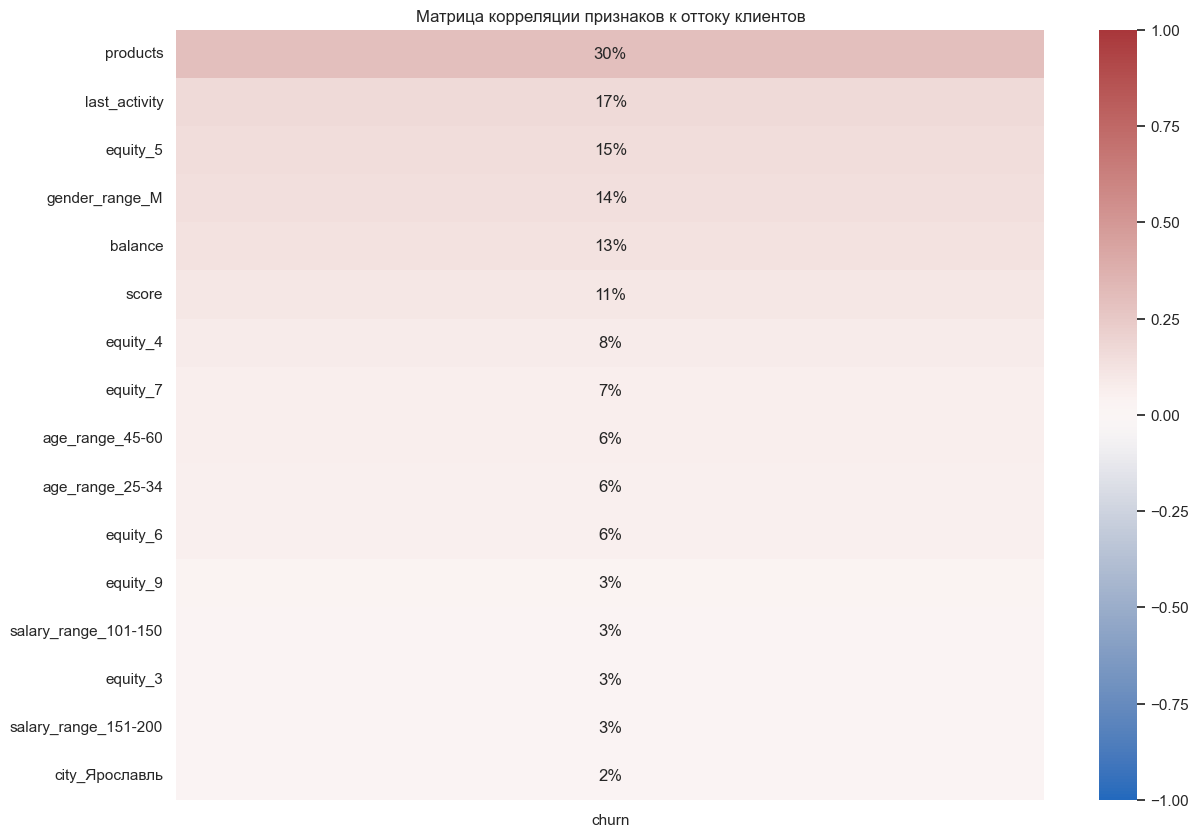

In [103]:
# Создаем матрицу корреляции:
corr_matrix = corr_data_test.corr()

# Отбираем столбец корреляций с целевой переменной churn и сортируем:
churn_corr = corr_matrix['churn'].drop('churn')
churn_corr_sorted = churn_corr.sort_values(ascending=False)

# применяем маску, чтобы убрать корреляцию меньше 0.02, занимают место
mask = churn_corr_sorted >= 0.02
churn_corr_sorted = churn_corr_sorted[mask]

# Рисуем хитмэп для столбца churn_corr_sorted
plt.figure(figsize=(14,10))
sns.heatmap(churn_corr_sorted.to_frame(), annot=True, cmap='vlag', fmt = ".0%", vmin=-1, vmax=1, center=0)
plt.title("Матрица корреляции признаков к оттоку клиентов")
plt.show()

**Вывод:**

Матрица корреляции демонстрирует, как на отток влияют:
* банковские продукты (чем больше продуктов у клиента, тем больше вероятность оттока);
* активность в последний месяц (активные за последние 30 дней клиенты уходят чаще);
* оценки собственности 5, 4, 7, 6, 9, 3 (последняя совсем незначительно);
* пол (мужчины уходят чаще);
* баланс на счете;
* оценка кредитного скоринга;
* возрастные диапазоны: 25-34 и 45-60 лет;
* зарплаты в диапазоне 101-150 и 151-200 тыс. руб.;
* город Ярославль.


### Составление портрета склонного к оттоку клиента.

Дополняя информацией, полученной благодаря анализу каждого признака, получаем следующую картину:

**Уходят преимущественно:**
* активные;
* мужчины (65%) или женщины (34,9%);
* из Ярославля (61,4%), Рыбинска (24%)
* 25-34 и 45-60 лет;
* с зарплатой 101-150 и 151-200 тыс. руб;
* с 2 или 4 продуктами;
* с оценкой собственности в основном от 4 до 7;
* с балансом в диапазонах 200-300 и 400-500 тыс руб;
* с баллами кредитного скоринга в диапазонах 750-860 и 861-950.

### Сегментация клиентов по категориям (баланс, возраст и т.д.) с учетом распределения.

**Важная ремарка:**
1. Сегментация выполняется для всех клиентов. Внутри сегментов потом будут выделены уходящие.
2. Сегменты не пересекаются по клиентам. Один клиент - один сегмент.

**Сегмент №1:**
<br><br>
Пол: мужской
<br>
Возраст: 25-34  <br>
Город: Ярославль
<br>
Оценка объектов собственности: от 1 до 7
<br>
Скоринговый рейтинг: от 750
<br>
Используемые продукты: от 1 до 5
<br>
Кредитная карта: неважно
<br>
Тип клиента: все клиенты (и уходящие, и остающиеся)

In [104]:
segment_01 = new_data.query (
    'gender_1_0==0 and equity>=1 and equity<=7 and score >=750 and age>=25 \
    and age<=34 and products >=1 and products <=5 and city_Ярославль==1') 
display(segment_01.head())
segment_01.shape

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_1_0,age_range,salary_range
28,123660,776,Ярославль,М,26,1,49105,1,True,True,38234,False,0,0,1,0,25-34,51-100
45,118849,826,Ярославль,М,31,4,333330,1,True,True,46981,False,0,0,1,0,25-34,51-100
77,191976,937,Ярославль,М,33,5,2061152,2,True,True,280670,True,0,0,1,0,25-34,201-300
80,148699,767,Ярославль,М,32,3,962094,2,True,False,106305,False,0,0,1,0,25-34,101-150
88,210088,894,Ярославль,М,29,3,786911,2,True,True,99022,True,0,0,1,0,25-34,51-100


(671, 18)

In [105]:
segment_01_churn = segment_01.query("churn==1")
segment_01_churn.shape

(243, 18)

**В сегмент №1 входит всего 671 чел, из них 243, т.е. 36,2% - уходящие.**

**Сегмент №2:**
<br><br>
Пол: мужской
<br>
Возраст: 35-44  <br>
Город: Ярославль
<br>
Оценка объектов собственности: от 1 до 7
 <br>
Скоринговый рейтинг: от 750
 <br>
Используемые продукты: от 1 до 5
<br>
Кредитная карта: неважно
<br>
Тип клиента: все клиенты (и уходящие, и остающиеся)

In [106]:
segment_02 = new_data.query (
    'gender_1_0==0 and equity>=1 and equity<=7 and score >=750 and age>=35 \
    and age<=44 and products >=1 and products <=5 and city_Ярославль==1') 
display(segment_02.head())
segment_02.shape

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_1_0,age_range,salary_range
14,172138,815,Ярославль,М,35,5,547499,2,True,True,105883,False,0,0,1,0,35-44,101-150
18,136651,876,Ярославль,М,40,5,2307947,2,False,False,287010,False,0,0,1,0,35-44,201-300
27,167316,766,Ярославль,М,36,1,250543,2,True,True,38843,False,0,0,1,0,35-44,51-100
29,210799,868,Ярославль,М,43,3,532311,1,True,False,144073,False,0,0,1,0,35-44,101-150
37,144893,766,Ярославль,М,39,3,207919,1,True,False,153522,False,0,0,1,0,35-44,151-200


(739, 18)

In [107]:
segment_02_churn = segment_02.query("churn==1")
segment_02_churn.shape

(215, 18)

**В сегмент №2 входит всего 739 чел, из них 215, т.е. 29% - уходящие.**

**Сегмент №3:**
<br><br>
Пол: мужской
<br>
Возраст: 45-60  <br>
Город: любой
<br>
Оценка объектов собственности: от 1 до 7
 <br>
Скоринговый рейтинг: от 750
 <br>
Используемые продукты: от 1 до 5
<br>
Кредитная карта: неважно
<br>
Тип клиента: все клиенты (и уходящие, и остающиеся)

In [108]:
segment_03 = new_data.query (
    'gender_1_0==0 and equity>=1 and equity<=7 and score >=750 and age>=45 \
    and age<=60 and products >=1 and products <=5') 
display(segment_03.head())
segment_03.shape

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_1_0,age_range,salary_range
5,202305,856,Рыбинск,М,56,4,863687,3,True,False,156619,False,0,1,0,0,45-60,151-200
8,211686,923,Ярославль,М,54,5,1206337,2,True,False,155371,False,0,0,1,0,45-60,151-200
16,123335,829,Ярославль,М,45,5,507842,1,True,True,169330,False,0,0,1,0,45-60,151-200
17,214277,793,Ярославль,М,53,3,627034,2,True,False,183430,False,0,0,1,0,45-60,151-200
22,161656,871,Ярославль,М,51,4,708866,1,True,False,106407,False,0,0,1,0,45-60,101-150


(891, 18)

In [109]:
segment_03_card = new_data.query (
    'gender_1_0==0 and equity>=1 and equity<=7 and score >=750 and age>=45 \
    and age<=60 and products >=1 and products <=5 and credit_card==1 and churn==1') 
display(segment_03_card.head())
segment_03_card.shape

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_1_0,age_range,salary_range
73,155403,859,Рыбинск,М,56,5,652553,2,True,True,60791,True,0,1,0,0,45-60,51-100
189,187293,902,Ярославль,М,58,5,1027757,1,True,True,89703,True,0,0,1,0,45-60,51-100
193,136849,819,Ярославль,М,53,2,1138881,2,True,True,112233,True,0,0,1,0,45-60,101-150
307,170532,848,Ярославль,М,54,3,829551,1,True,True,111322,True,0,0,1,0,45-60,101-150
349,158557,835,Ярославль,М,53,4,720449,2,True,False,174211,True,0,0,1,0,45-60,151-200


(186, 18)

In [110]:
segment_03_churn = segment_03.query("churn==1")
segment_03_churn.shape

(326, 18)

**В сегмент №3 входит всего 891 чел, из них 326, т.е. 36,6% - уходящие.**

**Сегмент №4:**
<br><br>
Пол: мужской
<br>
Возраст: 25-44  <br>
Город: не Ярославль (Рыбинск и Ростов)
<br>
Оценка объектов собственности: от 1 до 7
<br>
Скоринговый рейтинг: от 750
<br>
Используемые продукты: от 1 до 5
<br>
Кредитная карта: неважно
<br>
Тип клиента: все клиенты (и уходящие, и остающиеся)

In [111]:
segment_04 = new_data.query (
    'gender_1_0==0 and equity>=1 and equity<=7 and score >=750 and age>=25 \
    and age<=44 and products >=1 and products <=5 and city_Ярославль!=1') 
display(segment_04.head())
segment_04.shape

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_1_0,age_range,salary_range
20,114192,772,Ростов,М,43,3,1315511,2,False,False,143935,False,1,0,0,0,35-44,101-150
35,221927,863,Ростов,М,39,5,1461423,1,False,True,221699,False,1,0,0,0,35-44,201-300
40,129705,811,Рыбинск,М,34,2,129799,1,False,False,96242,True,0,1,0,0,25-34,51-100
53,208625,831,Ростов,М,28,2,75005,2,True,False,70283,False,1,0,0,0,25-34,51-100
55,115677,820,Ростов,М,34,2,237691,2,True,False,23243,False,1,0,0,0,25-34,51-100


(913, 18)

In [112]:
segment_04_churn = segment_04.query("churn==1")
segment_04_churn.shape

(273, 18)

 **В сегмент №4 входит всего 913 чел, из них 273, т.е. 29,9% - уходящие.**

**Сегмент №5:**
<br><br>
Пол: женский
<br>
Возраст: 25-44  <br>
Город: Ярославль
<br>
Оценка объектов собственности: от 1 до 7
 <br>
Скоринговый рейтинг: от 750
 <br>
Используемые продукты: от 1 до 5
<br>
Кредитная карта: неважно
<br>
Тип клиента: все клиенты (и уходящие, и остающиеся)

In [113]:
segment_05 = new_data.query (
    'gender_1_0==1 and equity>=1 and equity<=7 and score >=750 and age>=25 \
    and age<=44 and products >=1 and products <=5 and city_Ярославль==1') 
display(segment_05.head())
segment_05.shape

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_1_0,age_range,salary_range
6,177259,807,Ярославль,Ж,39,3,405042,3,False,True,103838,False,0,0,1,1,35-44,101-150
7,218868,825,Ярославль,Ж,38,4,458145,2,True,True,68085,False,0,0,1,1,35-44,51-100
12,132970,845,Ярославль,Ж,31,3,591928,2,True,True,112697,True,0,0,1,1,25-34,101-150
24,130826,898,Ярославль,Ж,39,5,561906,1,True,False,151221,False,0,0,1,1,35-44,151-200
49,214314,901,Ярославль,Ж,40,5,655642,2,False,False,224319,False,0,0,1,1,35-44,201-300


(1166, 18)

In [114]:
segment_05_churn = segment_05.query("churn==1")
segment_05_churn.shape

(232, 18)

**В сегмент №5 входит всего 1166 чел, из них 232, т.е. 19,9% - уходящие.**

**Сегмент №6:**
<br><br>
Пол: женский
<br>
Возраст: 45-60  <br>
Город: любой
<br>
Оценка объектов собственности: от 1 до 7
 <br>
Скоринговый рейтинг: от 750
 <br>
Используемые продукты: от 1 до 5
<br>
Кредитная карта: неважно
<br>
Тип клиента: все клиенты (и уходящие, и остающиеся)

In [115]:
segment_06 = new_data.query (
    'gender_1_0==1 and equity>=1 and equity<=7 and score >=750 and age>=45 \
    and age<=60 and products >=1 and products <=5') 
display(segment_06.head())
segment_06.shape

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_1_0,age_range,salary_range
3,225363,866,Ярославль,Ж,51,5,1524746,2,False,True,174423,True,0,0,1,1,45-60,151-200
32,219185,828,Ярославль,Ж,45,3,409634,2,False,False,134770,False,0,0,1,1,45-60,101-150
71,141119,792,Ростов,Ж,48,5,552231,2,False,True,116971,False,1,0,0,1,45-60,101-150
75,153521,825,Ярославль,Ж,48,4,253966,1,True,False,58008,False,0,0,1,1,45-60,51-100
82,155573,893,Рыбинск,Ж,48,5,1156992,1,True,True,112279,False,0,1,0,1,45-60,101-150


(1058, 18)

In [116]:
segment_06_churn = segment_06.query("churn==1")
segment_06_churn.shape

(231, 18)

 **В сегмент №6 входит всего 1058 чел, из них 231, т.е. 21,8% - уходящие.**

**Сегмент №7:**
<br><br>
Пол: женский
<br>
Возраст: 25-44  <br>
Город: не Ярославль (Рыбинск и Ростов)
<br>
Оценка объектов собственности: от 1 до 7
<br>
Скоринговый рейтинг: от 750
<br>
Используемые продукты: от 1 до 5
<br>
Кредитная карта: неважно
<br>
Тип клиента: все клиенты (и уходящие, и остающиеся)

In [117]:
segment_07 = new_data.query (
    'gender_1_0==1 and equity>=1 and equity<=7 and score >=750 and age>=25 \
    and age<=44 and products >=1 and products <=5 and city_Ярославль!=1') 
display(segment_07.head())
segment_07.shape

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_1_0,age_range,salary_range
0,183012,850,Рыбинск,Ж,25,1,59214,2,False,True,75719,True,0,1,0,1,25-34,51-100
1,146556,861,Рыбинск,Ж,37,5,850594,3,True,False,86621,False,0,1,0,1,35-44,51-100
13,166357,837,Рыбинск,Ж,28,4,302249,2,False,True,30950,False,0,1,0,1,25-34,51-100
31,152670,806,Ростов,Ж,36,5,377460,2,True,False,102885,False,1,0,0,1,35-44,101-150
33,125478,786,Ростов,Ж,27,3,448062,3,True,True,37607,False,1,0,0,1,25-34,51-100


(802, 18)

In [118]:
segment_07_churn = segment_07.query("churn==1")
segment_07_churn.shape

(96, 18)

 **В сегмент №7 входит всего 802 чел, из них 96, т.е. 11,9% - уходящие.**

#### Итог сегментации удобно представить в виде таблички:

In [119]:
segment_table = pd.DataFrame([['Сегмент №1', 671, 243, 36.2],
                              ['Сегмент №2', 739, 215, 29],
                              ['Сегмент №3', 891, 326, 36.6],
                              ['Сегмент №4', 913, 273, 29.9],
                              ['Сегмент №5', 1166, 232, 19.9],
                              ['Сегмент №6', 1058, 231, 21.8],
                              ['Сегмент №7', 802, 96, 11.9]
                             ], columns=['segment', 'total_clients', 'churn_clients', 'share_of_churn'])

segment_table = segment_table.sort_values(by='share_of_churn', ascending=False).reset_index(drop=True)
segment_table_1 = segment_table.append(segment_table[['total_clients', 'churn_clients']].sum(axis=0), ignore_index=True)
segment_table_1 = segment_table_1.fillna(value='Total')
segment_table_1

,segment,total_clients,churn_clients,share_of_churn
0,Сегмент №3,891,326,36.60
1,Сегмент №1,671,243,36.20
2,Сегмент №4,913,273,29.90
3,Сегмент №2,739,215,29.00
4,Сегмент №6,1058,231,21.80
5,Сегмент №5,1166,232,19.90
6,Сегмент №7,802,96,11.90
7,Total,6240,1616,Total


**Результат сегментации:**
1. Семь сегментов от 671 до 1166 чел. охватили в сумме 6240 всех клиентов, из которых 1616 клиентов уходящие.
2. Получается, что в 7 сегментов попали 88,9% всех уходящих клиентов банка (1616 от 1818).
3. При этом количество всех рассмотренных клиентов составляет 62,9% от общего их числа (6240 от 9922 всех клиентов).
4. Т.е. на оставшиеся 3682 человек, не попавших в сегментацию, приходится всего 202 уходящих клиента.
5. Сегментацию можно считать успешной. 
6. Лучшие сегменты (где доля уходящих составила примерно треть): 3, 1, 4, 2.
7. Ниже укажу общие и отличающиеся для них условия.

**I. Общие условия для всех сегментов:**<br>
Оценка объектов собственности: от 1 до 7 <br>
Скоринговый рейтинг: от 750 <br>
Используемые продукты: от 1 до 5 <br>
Кредитная карта: неважно <br>
Тип клиента: все клиенты (и уходящие, и остающиеся) <br>
<br>
**II. Отличающиеся условия, сегменты в порядке приоритета:**<br><br>
**Сегмент №3:**
<br>
Пол: мужской <br>
Возраст: 45-60 <br>
Город: любой <br>
<br>
**Сегмент №1:**
<br>
Пол: мужской
<br>
Возраст: 25-34  <br>
Город: Ярославль
<br><br>
**Сегмент №4:**
<br>
Пол: мужской
<br>
Возраст: 25-44  <br>
Город: не Ярославль (Рыбинск и Ростов)
<br><br>
**Сегмент №2:**
<br>
Пол: мужской
<br>
Возраст: 35-44  <br>
Город: Ярославль
<br>

#### Топ-4 сегментов по оттоку и кредитные карты

**Комментарий:** так как в пользу укрупнения сегментов я не стала дробить их на наличие/отсутствие кредитных карт, ниже я посчитаю по наиболее приоритетным сегментам, у скольких клиентов были кредитные карты:

In [120]:
#Сегмент 3: кредитная карта у всего сегмента и уходящих клиентов:
seg_03_card = segment_03.credit_card.value_counts().to_frame()
seg_03_card = seg_03_card.rename(columns = {'credit_card': 'all_clients'})
seg_03_card_churn = segment_03_churn.credit_card.value_counts().to_frame()
seg_03_card_churn = seg_03_card_churn.rename(columns = {'credit_card': 'churn_clients'})
seg_03_card_all = pd.concat([seg_03_card, seg_03_card_churn], axis=1)
seg_03_card_all = seg_03_card_all.reset_index().rename(columns = {'index': 'credit_card'})
seg_03_card_all['share_churn_of_all'] = ((seg_03_card_all['churn_clients'] / seg_03_card_all['churn_clients'].sum()) *100).round()
seg_03_card_all

,credit_card,all_clients,churn_clients,share_churn_of_all
0,True,579,186,57.00
1,False,312,140,43.00


**В сегменте №3:** 57% уходящих клиентов с картой, 43% - без карты.

In [121]:
#Сегмент 1: кредитная карта у всего сегмента и уходящих клиентов:
seg_01_card = segment_01.credit_card.value_counts().to_frame()
seg_01_card = seg_01_card.rename(columns = {'credit_card': 'all_clients'})
seg_01_card_churn = segment_01_churn.credit_card.value_counts().to_frame()
seg_01_card_churn = seg_01_card_churn.rename(columns = {'credit_card': 'churn_clients'})
seg_01_card_all = pd.concat([seg_01_card, seg_01_card_churn], axis=1)
seg_01_card_all = seg_01_card_all.reset_index().rename(columns = {'index': 'credit_card'})
seg_01_card_all['share_churn_of_all'] = ((seg_01_card_all['churn_clients'] / seg_01_card_all['churn_clients'].sum())*100).round()
seg_01_card_all

,credit_card,all_clients,churn_clients,share_churn_of_all
0,True,539,168,69.00
1,False,132,75,31.00


**В сегменте №1:** 69% уходящих клиентов с картой, 31% - без карты.

In [122]:
#Сегмент 4: кредитная карта у всего сегмента и уходящих клиентов:
seg_04_card = segment_04.credit_card.value_counts().to_frame()
seg_04_card = seg_04_card.rename(columns = {'credit_card': 'all_clients'})
seg_04_card_churn = segment_04_churn.credit_card.value_counts().to_frame()
seg_04_card_churn = seg_04_card_churn.rename(columns = {'credit_card': 'churn_clients'})
seg_04_card_all = pd.concat([seg_04_card, seg_04_card_churn], axis=1)
seg_04_card_all = seg_04_card_all.reset_index().rename(columns = {'index': 'credit_card'})
seg_04_card_all['share_churn_of_all'] = ((seg_04_card_all['churn_clients'] / seg_04_card_all['churn_clients'].sum())*100).round()
seg_04_card_all

,credit_card,all_clients,churn_clients,share_churn_of_all
0,True,588,149,55.00
1,False,325,124,45.00


**В сегменте №4:** 55% уходящих клиентов с картой, 45% - без карты.

In [123]:
#Сегмент 2: кредитная карта у всего сегмента и уходящих клиентов:
seg_02_card = segment_02.credit_card.value_counts().to_frame()
seg_02_card = seg_02_card.rename(columns = {'credit_card': 'all_clients'})
seg_02_card_churn = segment_02_churn.credit_card.value_counts().to_frame()
seg_02_card_churn = seg_02_card_churn.rename(columns = {'credit_card': 'churn_clients'})
seg_02_card_all = pd.concat([seg_02_card, seg_02_card_churn], axis=1)
seg_02_card_all = seg_02_card_all.reset_index().rename(columns = {'index': 'credit_card'})
seg_02_card_all['share_churn_of_all'] = ((seg_02_card_all['churn_clients'] / seg_02_card_all['churn_clients'].sum())*100).round()
seg_02_card_all

,credit_card,all_clients,churn_clients,share_churn_of_all
0,True,554,136,63.00
1,False,185,79,37.00


**В сегменте №2:** 63% уходящих клиентов с картой, 37% - без карты.

#### Топ-4 сегментов по оттоку и зарплаты уходящих клиентов

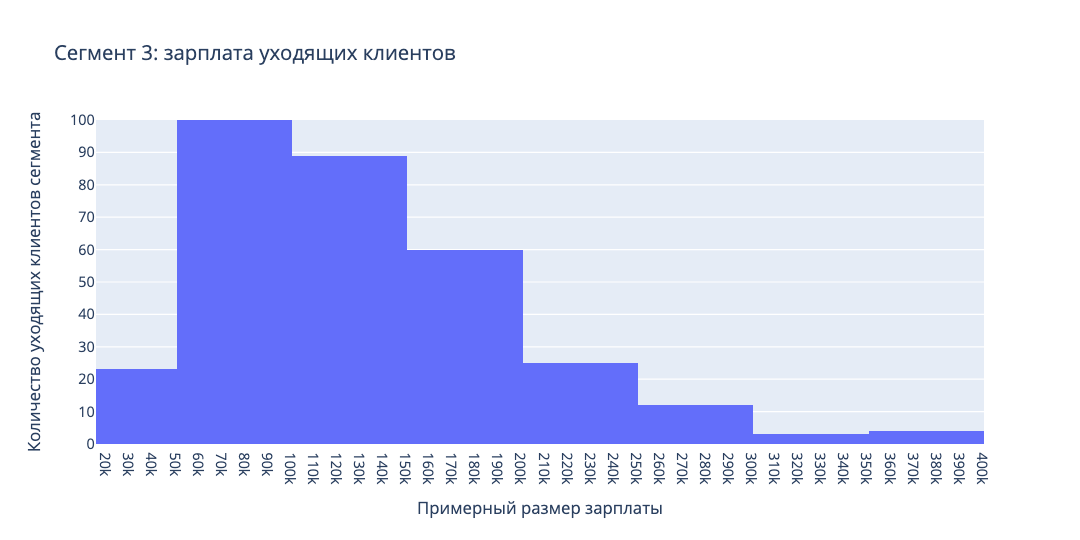

Сегмент 3, средняя зарплата уходящих: 146479.0


In [124]:
#Cегмент 3: зарплата уходящих клиентов
fig = px.histogram(segment_03_churn, x="est_salary", nbins=40, width=900, height=450, 
                   labels={"est_salary": "Зарплата", "count":'Количество'},
                title="Сегмент 3: зарплата уходящих клиентов")
fig.update_xaxes(tick0=0, dtick=10000,  range=(15000, 400000))
fig.update_yaxes(tick0=0, dtick=10,  range=(0,100))
fig.update_layout(xaxis_title='Примерный размер зарплаты',
                   yaxis_title='Количество уходящих клиентов сегмента') 
pio.show(fig, renderer='png', width=900, scale=1.2)
print('Сегмент 3, средняя зарплата уходящих:', segment_03_churn['est_salary'].mean().round())

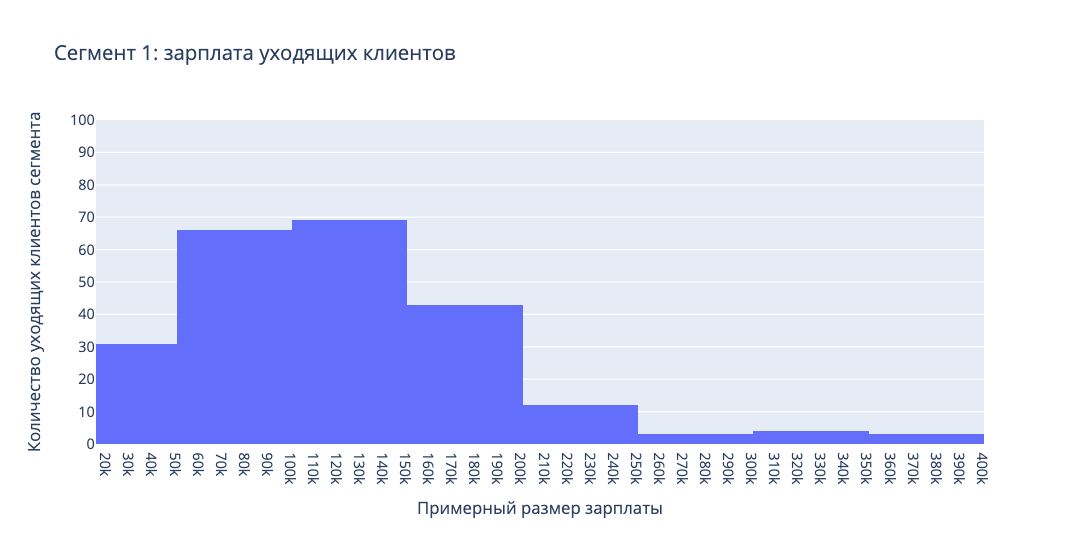

Сегмент 1, средняя зарплата уходящих: 154313.0


In [125]:
#Cегмент 1: зарплата уходящих клиентов
fig = px.histogram(segment_01_churn, x="est_salary", nbins=40, width=900, height=450, 
                   labels={"est_salary": "Зарплата", "count":'Количество'},
                title="Сегмент 1: зарплата уходящих клиентов")
fig.update_xaxes(tick0=0, dtick=10000,  range=(15000, 400000))
fig.update_yaxes(tick0=0, dtick=10,  range=(0,100))
fig.update_layout(xaxis_title='Примерный размер зарплаты',
                   yaxis_title='Количество уходящих клиентов сегмента') 
pio.show(fig, renderer='png', width=900, scale=1.2)
print('Сегмент 1, средняя зарплата уходящих:', segment_01_churn['est_salary'].mean().round())

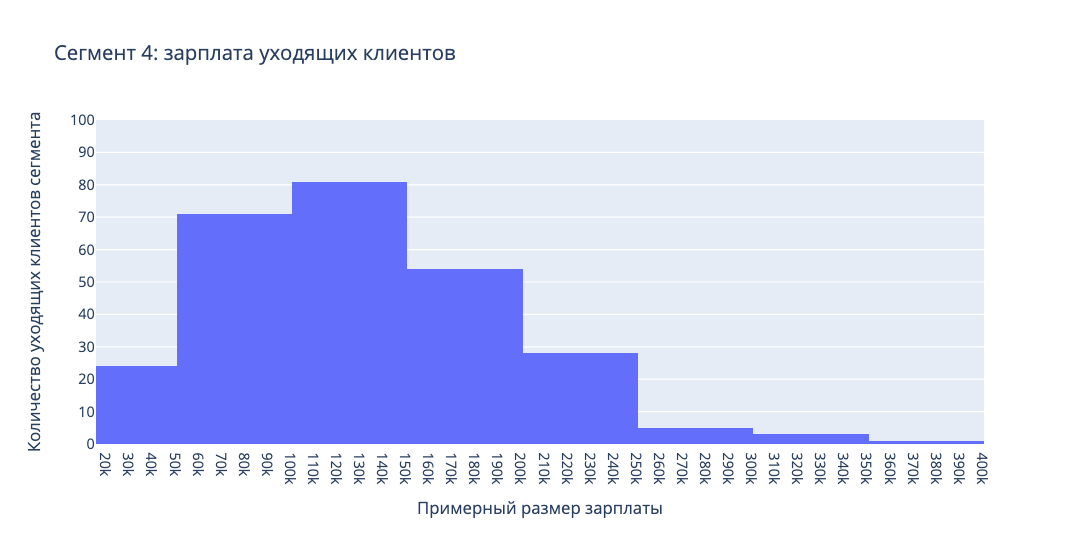

Сегмент 4, средняя зарплата уходящих: 139090.0


In [126]:
#Cегмент 4: зарплата уходящих клиентов
fig = px.histogram(segment_04_churn, x="est_salary", nbins=40, width=900, height=450, 
                   labels={"est_salary": "Зарплата", "count":'Количество'},
                title="Сегмент 4: зарплата уходящих клиентов")
fig.update_xaxes(tick0=0, dtick=10000,  range=(15000, 400000))
fig.update_yaxes(tick0=0, dtick=10,  range=(0,100))
fig.update_layout(xaxis_title='Примерный размер зарплаты',
                   yaxis_title='Количество уходящих клиентов сегмента') 
pio.show(fig, renderer='png', width=900, scale=1.2)
print('Сегмент 4, средняя зарплата уходящих:', segment_04_churn['est_salary'].mean().round())

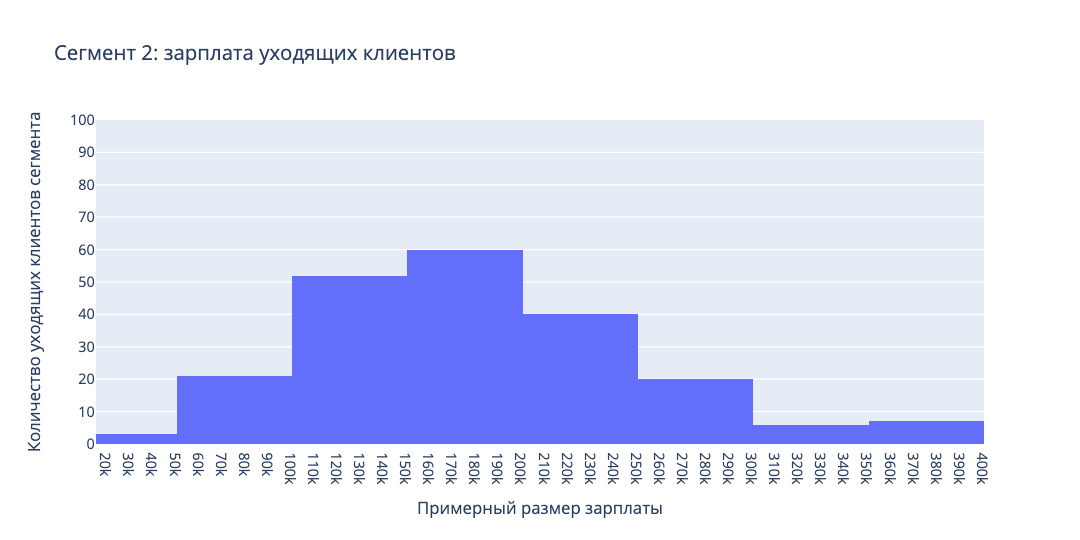

Сегмент 2, средняя зарплата уходящих: 196045.0


In [127]:
#Cегмент 2: зарплата уходящих клиентов
fig = px.histogram(segment_02_churn, x="est_salary", nbins=40, width=900, height=450, 
                   labels={"est_salary": "Зарплата", "count":'Количество'},
                title="Сегмент 2: зарплата уходящих клиентов")
fig.update_xaxes(tick0=0, dtick=10000,  range=(15000, 400000))
fig.update_yaxes(tick0=0, dtick=10,  range=(0,100))
fig.update_layout(xaxis_title='Примерный размер зарплаты',
                   yaxis_title='Количество уходящих клиентов сегмента') 
pio.show(fig, renderer='png', width=900, scale=1.2)
print('Сегмент 2, средняя зарплата уходящих:', segment_02_churn['est_salary'].mean().round())

#### Топ-4 сегмента, средний баланс уходящих:

In [128]:
#Топ-4 сегмента, средний баланс уходящих:
print('Сегмент 3, средний баланс уходящих:', segment_03_churn['balance'].mean().round())
print('Сегмент 1, средний баланс уходящих:', segment_01_churn['balance'].mean().round())
print('Сегмент 4, средний баланс уходящих:', segment_04_churn['balance'].mean().round())
print('Сегмент 2, средний баланс уходящих:', segment_02_churn['balance'].mean().round())

Сегмент 3, средний баланс уходящих: 1520215.0
Сегмент 1, средний баланс уходящих: 1167120.0
Сегмент 4, средний баланс уходящих: 922662.0
Сегмент 2, средний баланс уходящих: 1488662.0


#### Топ-4 сегмента, количество продуктов у уходящих:

In [129]:
seg_03_products = segment_03_churn.products.value_counts().to_frame()
seg_03_products = seg_03_products.reset_index()
display(seg_03_products)
print('Сегмент 3, в среднем продуктов у уходящих:', seg_03_products['index'].mean().round())

,index,products
0,2,177
1,3,63
2,4,52
3,1,33
4,5,1


Сегмент 3, в среднем продуктов у уходящих: 3.0


In [130]:
seg_01_products = segment_01_churn.products.value_counts().to_frame()
seg_01_products = seg_01_products.reset_index()
display(seg_01_products)
print('Сегмент 1, в среднем продуктов у уходящих:', seg_01_products['index'].mean().round())

,index,products
0,2,132
1,4,45
2,1,35
3,3,29
4,5,2


Сегмент 1, в среднем продуктов у уходящих: 3.0


In [131]:
seg_04_products = segment_04_churn.products.value_counts().to_frame()
seg_04_products = seg_04_products.reset_index()
display(seg_04_products)
print('Сегмент 4, в среднем продуктов у уходящих:', seg_04_products['index'].mean().round())

,index,products
0,2,173
1,4,44
2,1,39
3,3,16
4,5,1


Сегмент 4, в среднем продуктов у уходящих: 3.0


In [132]:
seg_02_products = segment_02_churn.products.value_counts().to_frame()
seg_02_products = seg_02_products.reset_index()
display(seg_02_products)
print('Сегмент 2, в среднем продуктов у уходящих:', seg_02_products['index'].mean().round())

,index,products
0,2,100
1,4,52
2,3,40
3,1,22
4,5,1


Сегмент 2, в среднем продуктов у уходящих: 3.0


#### Топ-4 сегмента, средняя оценка собственности у уходящих:

In [133]:
#Топ-4 сегмента, средняя оценка собственности у уходящих:
print('Сегмент 3, средняя оценка собственности у уходящих:', segment_03_churn['equity'].mean().round())
print('Сегмент 1, средняя оценка собственности у уходящих:', segment_01_churn['equity'].mean().round())
print('Сегмент 4, средняя оценка собственности у уходящих:', segment_04_churn['equity'].mean().round())
print('Сегмент 2, средняя оценка собственности у уходящих:', segment_02_churn['equity'].mean().round())

Сегмент 3, средняя оценка собственности у уходящих: 4.0
Сегмент 1, средняя оценка собственности у уходящих: 4.0
Сегмент 4, средняя оценка собственности у уходящих: 4.0
Сегмент 2, средняя оценка собственности у уходящих: 4.0


#### Портрет. Промежуточный вывод: <br>
Примерный портрет клиента, который склонен уходить из банка, по итогам сегментации можно описать так:<br>
Мужчина от 25 до 44 лет из Ярославля, с оценкой объектов собственности от 1 до 7, скоринговый рейтинг от 750, используемыми продуктами от 1 до 5. Скорее пользуется кредитной картой, чем нет.

Если добавить предыдущее исследование именно уходящих клиентов, то мы убедились в его правильности. <br> <br>

**Резюмируя все вместе, портрет уходящего клиента таков:**
* активный за последние 30 дней.
* мужчина (65%).
* из Ярославля (61,4%).
* 25-34, 35-45 или 45-60 лет, в среднем - 34 года.
* с зарплатой 101-200 тыс. руб, средняя - 159 тыс. руб.
* с 2-3 продуктами.
* с оценкой собственности от 4 до 7, средняя - 4.
* со средним балансом на счете в 1,27 млн. руб.
* с баллами кредитного скоринга от 750 и выше.
* скорее всего есть кредитная карта (минимум у 55% уходящих клиентов по топ-4 сегментам она есть).

## Статистический анализ данных и проверка гипотез:

### Формулирование первой гипотезы о различии дохода между теми клиентами, которые ушли и теми, которые остались. Её проверка.

Формулируем гипотезу о различии среднего дохода: <br> <br>
H0: средние доходы остающихся и уходящих клиентов **равны.** <br>
H1: средние доходы остающихся и уходящих клиентов **не равны.**
<br>
Поскольку мы проверяем гипотезу о равенстве среднего двух неравных генеральных совокупностей, применим метод .ttest_ind() с условием equal_var=False из библиотеки scipy.stats:

In [134]:
#Гипотеза 1: средние доходы остающихся и уходящих клиентов различаются.
#H0: средние доходы равны, Н1: средние доходы не равны:

churn_test = new_data[new_data['churn']==1]['est_salary']
remained_test = new_data[new_data['churn']==0]['est_salary']
alpha = .05
results = st.ttest_ind(churn_test, remained_test, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("H0 следует опровергнуть. Средние доходы остающихся и уходящих клиентов различаются.")
else:
    print("H0 следует принять. Средние доходы остающихся и уходящих клиентов равны.")

p-значение: 0.8707049377483823
H0 следует принять. Средние доходы остающихся и уходящих клиентов равны.


**Вывод:**<br>
Проведенный тест показал, что нулевую гипотезу об отсутствии различий в средних доходах остающихся и уходящих клиентов следует принять.

### Формулирование второй гипотезы, её проверка.


В качестве второй проверю гипотезу о среднем возрасте клиентов: <br> <br>
H0: средний возраст остающихся и уходящих клиентов **равен.** <br>
H1: средний возраст остающихся и уходящих клиентов **не равен.**

In [135]:
#Гипотеза 2: средний возраст остающихся и уходящих клиентов различается.
#H0: средний возраст равен, Н1: средний возраст не равен:

churn_test = new_data[new_data['churn']==1]['age']
remained_test = new_data[new_data['churn']==0]['age']
alpha = .05
results = st.ttest_ind(churn_test, remained_test, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("H0 следует опровергнуть. Средний возраст остающихся и уходящих клиентов различается.")
else:
    print("H0 следует принять. Средний возраст остающихся и уходящих клиентов равен.")

p-значение: 8.35958035734552e-08
H0 следует опровергнуть. Средний возраст остающихся и уходящих клиентов различается.


**Вывод:** <br>
Проведенный тест показал, что нулевую гипотезу об отсутствии различий в возрасте остающихся и уходящих клиентов следует опровергнуть.

### Формулирование третьей гипотезы, её проверка.


В качестве третьей проверю гипотезу о кредитной карте клиентов: <br> <br>
H0: среднее количество кредитных карт у остающихся и уходящих клиентов **равно.** <br>
H1: среднее количество кредитных карт у остающихся и уходящих клиентов **не равно.**

In [136]:
#Гипотеза 3: среднее количество кредитных карт у остающихся и уходящих клиентов различается.
#H0: среднее количество кредитных карт равно, Н1: среднее количество кредитных карт не равно:

churn_test = new_data[new_data['churn']==1]['credit_card']
remained_test = new_data[new_data['churn']==0]['credit_card']
alpha = .05
results = st.ttest_ind(churn_test, remained_test, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("H0 следует опровергнуть. Cреднее количество кредитных карт у остающихся и уходящих клиентов различается.")
else:
    print("H0 следует принять. Cреднее количество кредитных карт у остающихся и уходящих клиентов равно.")

p-значение: 3.714248387672835e-34
H0 следует опровергнуть. Cреднее количество кредитных карт у остающихся и уходящих клиентов различается.


### Промежуточный вывод

Было сформулировано три гипотезы:

1. Средние доходы остающихся и уходящих клиентов равны. **H0 принята.**
2. Средний возраст остающихся и уходящих клиентов равен. **H0 опровергнута.**
3. Среднее количество кредитных карт у остающихся и уходящих клиентов равно. **H0 опровергнута.**

В итоге две из трех нулевых гипотез опровергнуты.

## Рекомендации отделу маркетинга

#### Рекомендации отделу маркетинга по работе с уходящими клиентами

**Сегмент №3:** - уходит 36,6% клиентов
<br>
Пол: мужской <br>
Возраст: 45-60 <br>
Город: Ярославль, Рыбинск и Ростов <br>
Средняя зарплата: 146 тыс. руб. <br>
Средний баланс на счете: 1,52 млн. руб. <br>
Банковские продукты: 2-3 <br>
Кредитная карта: есть у 57% уходящих <br>
<br>
**Рекомендации для сегмента №3:**
- специальные условия по страхованию жизни;
- специальные условия по страхованию недвижимости;
- специальные условия по страхованию автомобиля;
- рекомендации по участию в ПИФах банка на акции и облигации с высокой защитой для накопления будущей части пенсии;
- рекомендации по открытию инвестиционного счета в банке с переводом суммы, которую не покрывает страховка вкладов (до 1,2 млн) на счет ИИС для дальнейшего получения налогового вычета в течение 3 лет в размере 13% от суммы на инвестсчете;

<br><br>
**Сегмент №1:** - уходит 36,2% клиентов
<br>
Пол: мужской <br>
Возраст: 25-34  <br>
Город: Ярославль <br>
Средняя зарплата: 154 тыс. руб. <br>
Средний баланс на счете: 1,17 млн. руб. <br>
Банковские продукты: 2-3 <br>
Кредитная карта: есть у 69% уходящих <br>
<br>
**Рекомендации для сегмента №3:**
- специальные условия по потребительскому кредиту на ближайший год;
- специальные условия по зарплатному проекту (например, кэшбек 2% с каждой зарплаты на следующие полгода);
- рекомендации по открытию инвестиционного счета в банке с последующим сопровождением сделок сотрудниками инвестотдела банка;
- повышенный кэшбек по кредитной карте на следующие полгода на все категории покупок (5%);
- удлиненный период беспроцентного пользования кредитной картой на следующий год;
- внесение в стоп-лист колл-центра банка, чтобы лишний раз не раздражать предложениями.

<br><br>
**Сегмент №4:** - уходит 29,9% клиентов
<br>
Пол: мужской <br>
Возраст: 25-44  <br>
Город: не Ярославль (Рыбинск и Ростов) <br>
Средняя зарплата: 139 тыс. руб. <br>
Средний баланс на счете: 922 тыс. руб. <br>
Банковские продукты: 2-3 <br>
Кредитная карта: есть у 55% уходящих <br>

**Рекомендации для сегмента №4:**
- специальные условия по потребительскому кредиту на ближайший год;
- специальные условия по ипотеке на ближайший год;
- специальные условия по страхованию автомобиля;
- рекомендации по участию в ПИФах банка на акции и облигации с умеренным риском и повышенной доходностью для формирования капитала;
- рекомендации по открытию инвестиционного счета в банке с последующим сопровождением сделок сотрудниками инвестотдела банка;
- повышенный кэшбек по кредитной карте на следующие полгода на все категории покупок (5%);
- удлиненный период беспроцентного пользования кредитной картой на следующий год.

<br><br>
**Сегмент №2:** - уходит 29% клиентов
<br>
Пол: мужской<br>
Возраст: 35-44  <br>
Город: Ярославль  <br>
Средняя зарплата: 196 тыс. руб. <br>
Средний баланс на счете: 1,49 млн. руб. <br>
Банковские продукты: 2-3 <br>
Кредитная карта: есть у 63% уходящих <br>
<br>

**Рекомендации для сегмента №2:**
- специальные условия по ипотеке на ближайший год;
- специальные условия по зарплатному проекту (например, кэшбек 2% с каждой зарплаты на следующие полгода);
- специальные условия по страхованию автомобиля;
- рекомендации по участию в ПИФах банка на акции и облигации с умеренным риском и повышенной доходностью для формирования капитала;
- рекомендации по открытию инвестиционного счета в банке с переводом суммы, которую не покрывает страховка вкладов (до 1,2 млн) на счет ИИС для дальнейшего получения налогового вычета в течение 3 лет в размере 13% от суммы на инвестсчете;
- удлиненный период беспроцентного пользования кредитной картой на следующий год.


## Общий вывод

**Целью данного проекта** являлось проведение анализа клиентов банка и выявление сегментов клиентов, наиболее склонных к уходу из банка. <br><br>
Цель проекта считаю выполненной: проведен подробный исследовательский анализ данных с их предварительной обработкой, выявлены топ-4 сегмента, в которых треть клиентов склонна к уходу. Данные сегменты описаны детально. Предоставлены рекомендации отделу маркетинга по дальнейшей работе с уходящими клиентами.
<br><br>
В процессе работы для достижения цели были **выполнены следующие задачи:**
1. Проведение исследовательского анализа данных.
2. Выделение портретов клиентов, которые склонны уходить из банка.
3. Формулировка и проверка статистических гипотез.
<br><br>
**Результаты выполненных задач:**
<br><br>
**1. По итогам исследовательского анализа данных сформулированы следующие наблюдения:**
* Из банка собирается уходить 18,3% клиентов или 1818 человек.
* Скоринговые баллы уходящих, два основных диапазона - 750-860 и 861-950.
* Средний арифметический балл скоринга остающихся - 845, уходящих - 863.
* Минимальный балл скоринга остающихся - 642, уходящих - 706.
* Из всех уходящих 61,4% - Ярославль, 24% - Рыбинск, 14,6% - Ростов.
* Среди уходящих доля мужчин существенно выше, чем женщин - 65% против 34.9%.
* Возрастной пик уходящих - 34 года. Два основных диапазона уходящих: 25-34 и 35-44.
* Средний возраст уходящих - 41,4 года. Остающихся - 43 года.
* Среди уходящих клиентов преобладают оценки собственности 5, 4, 3. С оценкой 5 - 31% уходящих, 4 - 25,5%, 3 - 17,6%.
* Среди остающихся и среди уходящих баланс на счете преимущественно 200-300 тыс. руб, на втором месте - 400-500 тыс. руб.
* Средний арифметический баланс уходящих существенно выше, чем остающихся - 1 134 457 руб. против 733 тыс руб.
* Доля баланса уходящих от суммарного баланса всех клиентов банка - 32%.
* Большинство клиентов использует 2 продукта.
* 53,7% уходящих использует 2 продукта. 16,5% - три продукта.
* Среди уходящих клиентов больше половины (55%) пользуются кредитной картой.
* Доля использующих кредитную карту среди всех клиентов - 68%.
* 70% уходящих клиентов активны. Среди остающихся активны лишь 51,6% клиентов.
* Больше всего уходящих с зарплатой в диапазоне 100-200 тыс., на 2-м месте диапазон 15-100 тыс, а на 3-м - 200-300 тыс.
* Средняя арифметическая зарплата остающихся и уходящих не сильно отличается, +- 148 тыс. рублей.
<br><br>

**2. По итогам анализа данных, построения матрицы корреляции и сегментации описан портрет клиентов, склонных уходить из банка:**
<br>
* активный за последние 30 дней
* мужчина (65%)
* из Ярославля (61,4%)
* 25-34, 35-45 или 45-60 лет, в среднем - 34 года
* с зарплатой 101-200 тыс. руб, средняя - 159 тыс. руб
* с 2-3 продуктами
* с оценкой собственности от 4 до 7, средняя - 4
* со средним балансом на счете в 1,27 млн. руб.
* с баллами кредитного скоринга от 750 и выше
* скорее всего есть кредитная карта (минимум у 55% уходящих клиентов по топ-4 сегментам она есть).
<br><br>

**Результат сегментации:**

1. Семь сегментов от 671 до 1166 чел. охватили в сумме 6240 всех клиентов, из которых 1616 клиентов уходящие.
2. Получается, что в 7 сегментов попали 88,9% всех уходящих клиентов банка.
3. При этом количество всех рассмотренных клиентов составляет 62,9% от общего их числа.
4. Лучшие сегменты (доля уходящих - треть): 3, 1, 4, 2.
<br><br>
**3. Было сформулировано и проверено три гипотезы:**
1. Средние доходы остающихся и уходящих клиентов равны. H0 принята: средние доходы равны.
2. Средний возраст остающихся и уходящих клиентов равен. H0 опровергнута: средний возраст различается.
3. Среднее количество кредитных карт у остающихся и уходящих клиентов равно. H0 опровергнута: среднее количество кредиток различается.

Искренне надеюсь, что предоставленный анализ позволит банку решить проблему с уходящими клиентами в кратчайшие сроки и максимально эффективно.



<a href="https://disk.yandex.ru/d/UvONSenpUyrlwQ">Ссылка на презентацию</a><br>
<a href="https://public.tableau.com/shared/HZCF2GWB9?:display_count=n&:origin=viz_share_link">Ссылка на дашборд Tableau</a>

**Спасибо за внимание!**